In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest,f_regression
pd.options.display.float_format = '{:.2f}'.format

In [258]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Linear_regression_practice'

In [237]:
pd.read_csv('../LinearRegression/Dataset/housing_prices_dataset.csv')

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0    10000.00       NaN        NaN   Commercial       1973        NaN   
1     1930.87      4.00       3.00   Industrial       1928       0.00   
2     2323.84      5.00       1.00   Commercial       2009       0.00   
3     2761.51      4.00       2.00   Industrial       1962       1.00   
4     1882.92      3.00       2.00       Suburb       2001       0.00   
...       ...       ...        ...          ...        ...        ...   
4995  1975.52      2.00        NaN   Industrial       1948       0.00   
4996  2355.71      4.00       2.00   Commercial       1936       0.00   
4997  3556.46      2.00       1.00   Industrial       1930       0.00   
4998  2404.02      2.00       1.00       Suburb       1930       1.00   
4999  1575.97      1.00       1.00     Downtown       1958       0.00   

     LuxuryRating  ProximityToCityCenter  Condition      Price  
0          Medium                  30.00       5.49 1488980.07  
1          Medium                   1.80       7.00  638342.80  
2          Medium                   7.57       3.09  585864.15  
3             Low                   2.76       5.36  714818.82  
4          Medium                   5.54       3.72  563705.77  
...           ...                    ...        ...        ...  
4995       Medium                   4.50       4.56  557243.49  
4996          Low                   3.16       4.54  689191.72  
4997          Low                   5.28       6.34  760530.27  
4998          Low                   6.53       6.88  575174.84  
4999          Low                   4.72       4.82  431929.06  

[5000 rows x 10 columns]

In [238]:
data = pd.read_csv('../LinearRegression/Dataset/housing_prices_dataset.csv')

In [239]:
data

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0    10000.00       NaN        NaN   Commercial       1973        NaN   
1     1930.87      4.00       3.00   Industrial       1928       0.00   
2     2323.84      5.00       1.00   Commercial       2009       0.00   
3     2761.51      4.00       2.00   Industrial       1962       1.00   
4     1882.92      3.00       2.00       Suburb       2001       0.00   
...       ...       ...        ...          ...        ...        ...   
4995  1975.52      2.00        NaN   Industrial       1948       0.00   
4996  2355.71      4.00       2.00   Commercial       1936       0.00   
4997  3556.46      2.00       1.00   Industrial       1930       0.00   
4998  2404.02      2.00       1.00       Suburb       1930       1.00   
4999  1575.97      1.00       1.00     Downtown       1958       0.00   

     LuxuryRating  ProximityToCityCenter  Condition      Price  
0          Medium                  30.00       5.49 1488980.07  
1          Medium                   1.80       7.00  638342.80  
2          Medium                   7.57       3.09  585864.15  
3             Low                   2.76       5.36  714818.82  
4          Medium                   5.54       3.72  563705.77  
...           ...                    ...        ...        ...  
4995       Medium                   4.50       4.56  557243.49  
4996          Low                   3.16       4.54  689191.72  
4997          Low                   5.28       6.34  760530.27  
4998          Low                   6.53       6.88  575174.84  
4999          Low                   4.72       4.82  431929.06  

[5000 rows x 10 columns]

In [240]:
data.head()

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0 10000.00       NaN        NaN   Commercial       1973        NaN   
1  1930.87      4.00       3.00   Industrial       1928       0.00   
2  2323.84      5.00       1.00   Commercial       2009       0.00   
3  2761.51      4.00       2.00   Industrial       1962       1.00   
4  1882.92      3.00       2.00       Suburb       2001       0.00   

  LuxuryRating  ProximityToCityCenter  Condition      Price  
0       Medium                  30.00       5.49 1488980.07  
1       Medium                   1.80       7.00  638342.80  
2       Medium                   7.57       3.09  585864.15  
3          Low                   2.76       5.36  714818.82  
4       Medium                   5.54       3.72  563705.77

In [241]:
data.shape

(5000, 10)

In [242]:
data.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'HasGarage', 'LuxuryRating', 'ProximityToCityCenter', 'Condition',
       'Price'],
      dtype='object')

In [243]:
data.dtypes

Size                     float64
Bedrooms                 float64
Bathrooms                float64
Neighborhood              object
YearBuilt                  int64
HasGarage                float64
LuxuryRating              object
ProximityToCityCenter    float64
Condition                float64
Price                    float64
dtype: object

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Size                   5000 non-null   float64
 1   Bedrooms               4500 non-null   float64
 2   Bathrooms              4666 non-null   float64
 3   Neighborhood           5000 non-null   object 
 4   YearBuilt              5000 non-null   int64  
 5   HasGarage              4750 non-null   float64
 6   LuxuryRating           5000 non-null   object 
 7   ProximityToCityCenter  5000 non-null   float64
 8   Condition              5000 non-null   float64
 9   Price                  5000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 390.8+ KB


In [245]:
data.describe()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
count  5000.00   4500.00    4666.00    5000.00    4750.00   
mean   2163.99      3.00       2.01    1959.81       0.49   
std    1223.45      1.43       0.81      35.33       0.50   
min     379.37      1.00       1.00    1900.00       0.00   
25%    1678.03      2.00       1.00    1929.00       0.00   
50%    2019.06      3.00       2.00    1959.50       0.00   
75%    2354.86      4.00       3.00    1991.00       1.00   
max   10000.00      5.00       3.00    2020.00       1.00   

       ProximityToCityCenter  Condition      Price  
count                5000.00    5000.00    5000.00  
mean                    5.25       5.02  603261.56  
std                     3.19       1.98  176171.91  
min                    -1.88      -3.37  257086.63  
25%                     3.60       3.67  522737.75  
50%                     5.02       5.02  584312.14  
75%                     6.37       6.37  648272.31  
max                    30.00      11.69 1837661.95

In [246]:
data.isna().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
Neighborhood               0
YearBuilt                  0
HasGarage                250
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

In [247]:
data['Size'].value_counts()

Size
10000.00    100
1227.14       1
2251.39       1
1925.52       1
1317.09       1
           ... 
1500.35       1
1988.57       1
2648.50       1
1696.09       1
1575.97       1
Name: count, Length: 4901, dtype: int64

In [248]:
data['Bedrooms'].value_counts()

Bedrooms
1.00    926
5.00    925
4.00    894
2.00    888
3.00    867
Name: count, dtype: int64

In [249]:
data['LuxuryRating'].value_counts()

LuxuryRating
Medium    2549
Low       1498
High       953
Name: count, dtype: int64

In [250]:
data.duplicated().sum()

np.int64(0)

<Axes: >

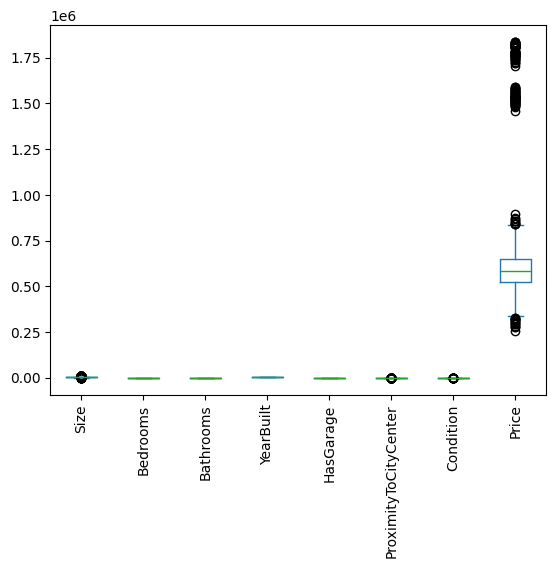

In [251]:
data.plot(kind='box',rot=90)

<Axes: >

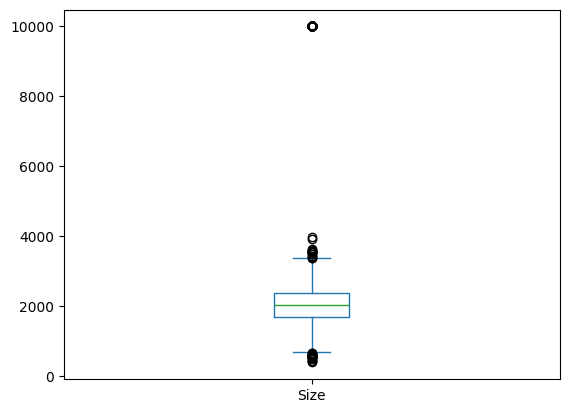

In [252]:
data['Size'].plot(kind='box')

In [253]:
lf=data['Size'][data['Size']<=662].count()
print('Values less than Lower Fence:',data['Size'][data['Size']<=662].count())
uf=data['Size'][data['Size']>=3370].count()
print('Values higher than Upper Fence:',data['Size'][data['Size']>=3370].count())
print('Total number of Outliers:',lf+uf)

Values less than Lower Fence: 22
Values higher than Upper Fence: 116
Total number of Outliers: 138


<Axes: >

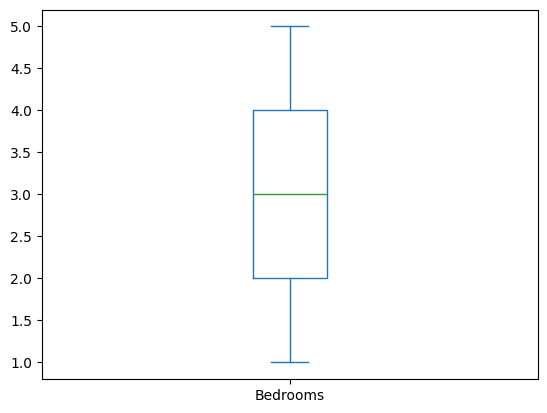

In [254]:
data['Bedrooms'].plot(kind='box')

<Axes: >

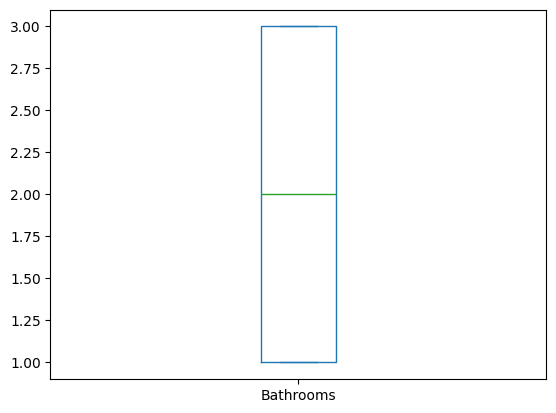

In [255]:
data['Bathrooms'].plot(kind='box')

In [259]:
data.corr()

ValueError: could not convert string to float: 'Commercial'

In [ ]:
data.dtypes

Size                     float64
Bedrooms                 float64
Bathrooms                float64
Neighborhood              object
YearBuilt                  int64
HasGarage                float64
LuxuryRating              object
ProximityToCityCenter    float64
Condition                float64
Price                    float64
dtype: object

In [ ]:
df=data.select_dtypes(exclude='object')

In [ ]:
df.corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                   1.00     -0.00       0.00      -0.01      -0.00   
Bedrooms              -0.00      1.00      -0.01       0.00      -0.01   
Bathrooms              0.00     -0.01       1.00      -0.01       0.01   
YearBuilt             -0.01      0.00      -0.01       1.00       0.02   
HasGarage             -0.00     -0.01       0.01       0.02       1.00   
ProximityToCityCenter  0.50     -0.00       0.00       0.01       0.02   
Condition             -0.00      0.00       0.00       0.02      -0.01   
Price                  0.95      0.39       0.16       0.01      -0.01   

                       ProximityToCityCenter  Condition  Price  
Size                                    0.50      -0.00   0.95  
Bedrooms                               -0.00       0.00   0.39  
Bathrooms                               0.00       0.00   0.16  
YearBuilt                               0.01       0.02   0.01  
HasGarage                               0.02      -0.01  -0.01  
ProximityToCityCenter                   1.00      -0.01   0.34  
Condition                              -0.01       1.00   0.01  
Price                                   0.34       0.01   1.00

<Axes: >

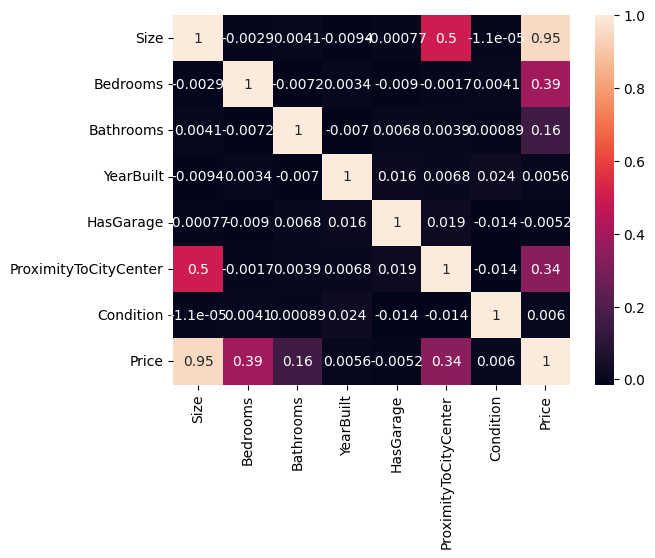

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Figure size 640x480 with 0 Axes>

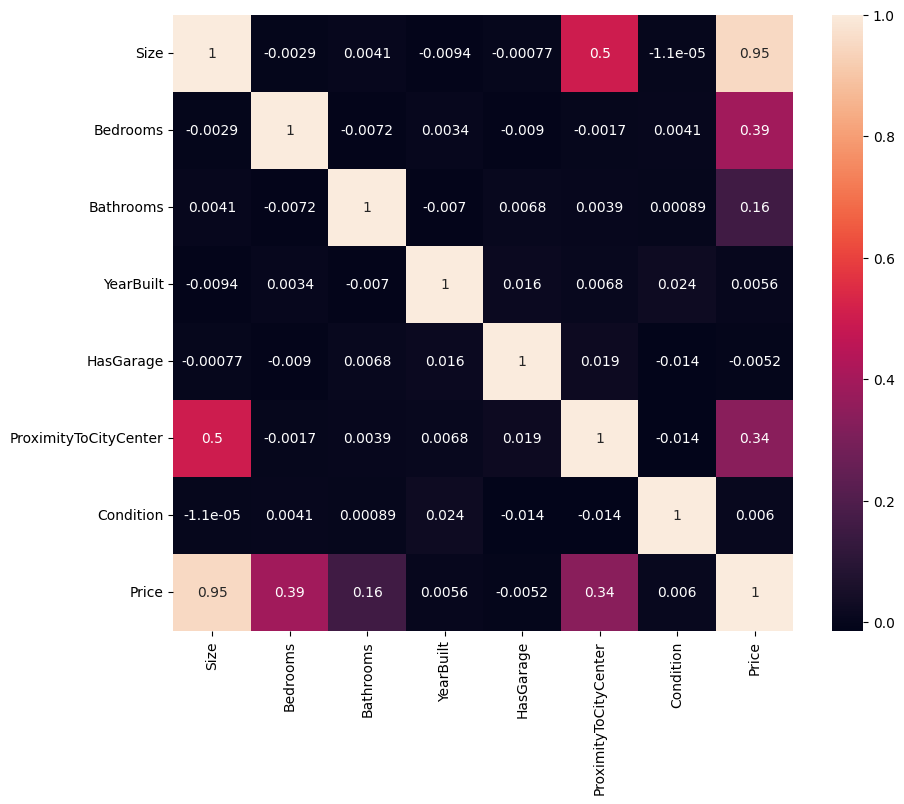

In [ ]:
plt.figure()
plt.figure(figsize=(10, 8))  # Adjust figsize to fit your needs
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: ylabel='Frequency'>

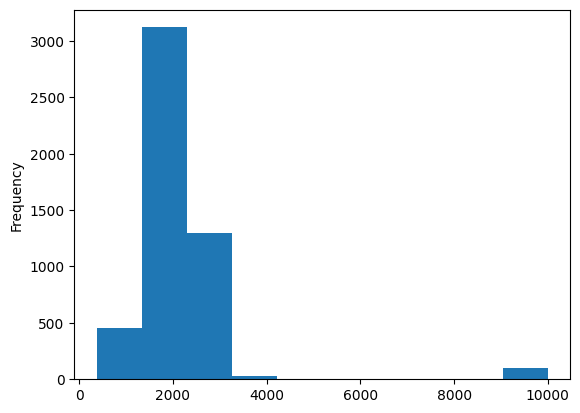

In [ ]:
df['Size'].plot(kind='hist')

<Axes: >

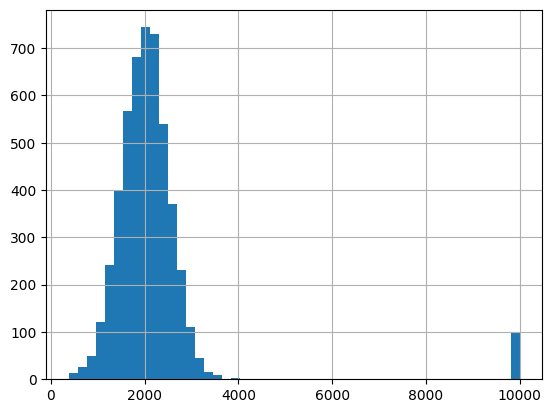

In [ ]:
df['Size'].hist(bins=50)

<Axes: >

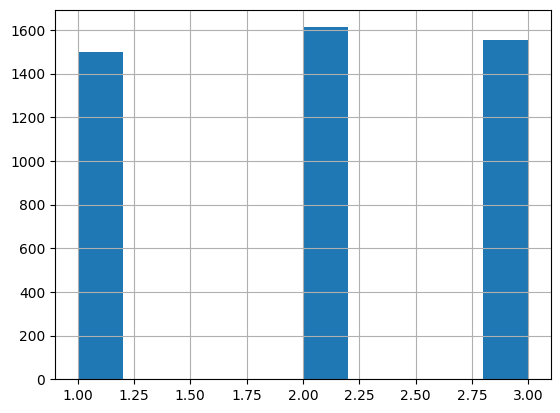

In [ ]:
df['Bathrooms'].hist()

<Axes: >

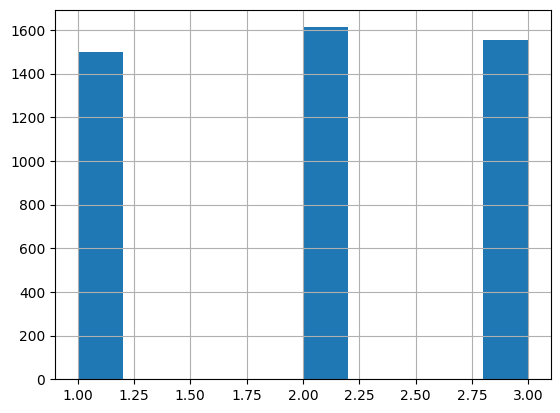

In [ ]:
df['Bathrooms'].hist()

In [ ]:
num_cols = df.columns

In [ ]:
num_cols

Index(['Size', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'HasGarage',
       'ProximityToCityCenter', 'Condition', 'Price'],
      dtype='object')

Size
Bedrooms
Bathrooms
YearBuilt
HasGarage
ProximityToCityCenter
Condition
Price


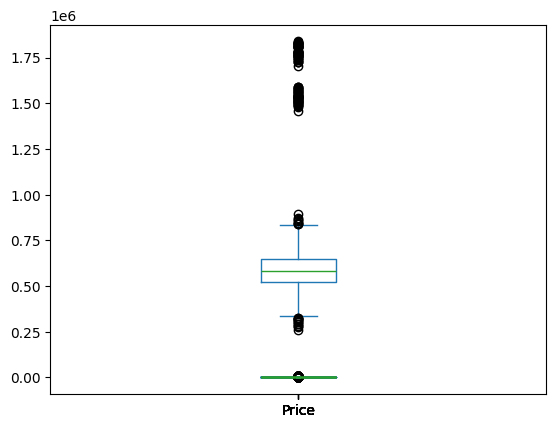

In [ ]:
for i in num_cols:
    print(i)
    data[i].plot(kind='box')
    plt.show

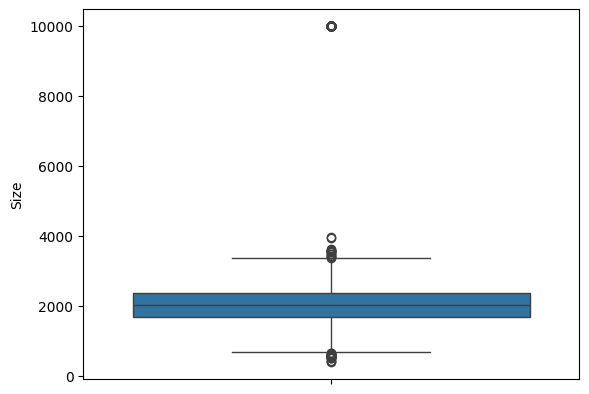

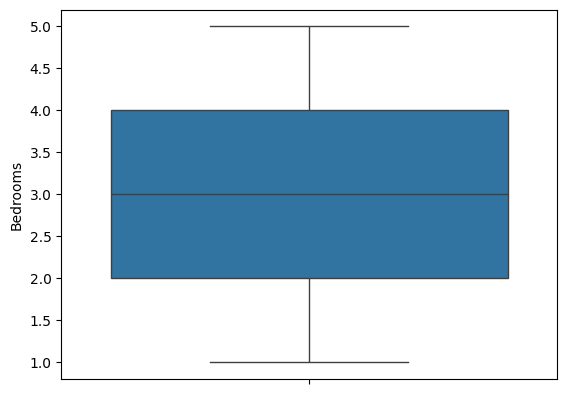

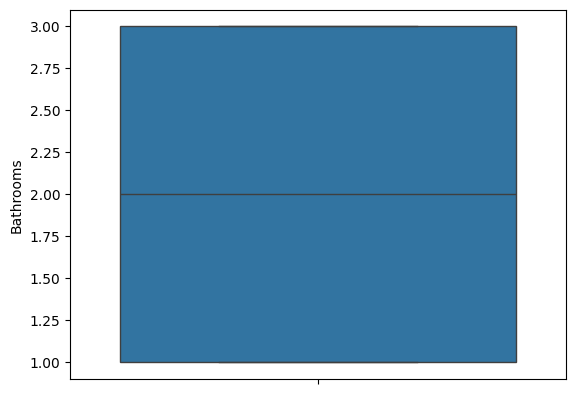

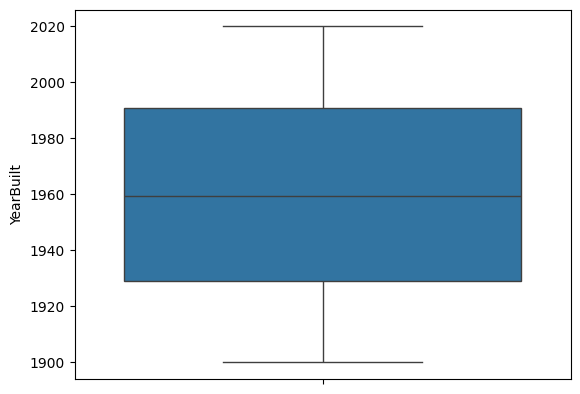

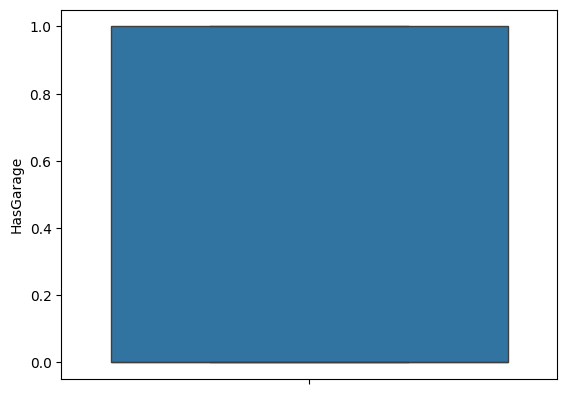

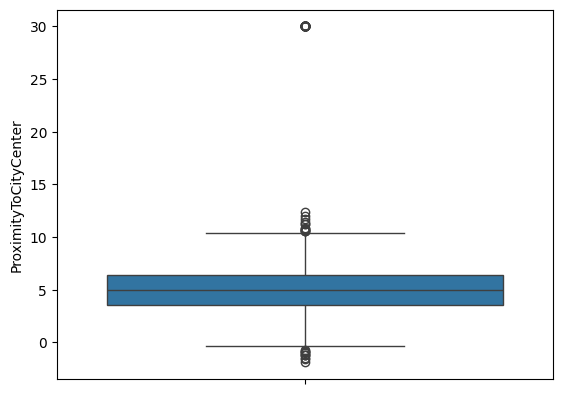

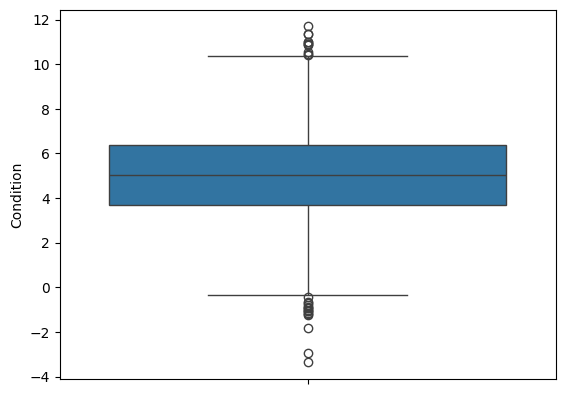

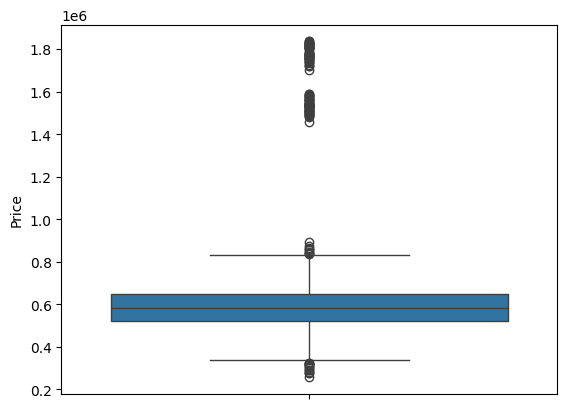

In [ ]:
for i in num_cols:
    sns.boxplot(data[i])
    plt.show()

In [ ]:
data[num_cols].corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                   1.000000 -0.002868   0.004128  -0.009397  -0.000767   
Bedrooms              -0.002868  1.000000  -0.007199   0.003371  -0.009011   
Bathrooms              0.004128 -0.007199   1.000000  -0.007046   0.006780   
YearBuilt             -0.009397  0.003371  -0.007046   1.000000   0.016489   
HasGarage             -0.000767 -0.009011   0.006780   0.016489   1.000000   
ProximityToCityCenter  0.498816 -0.001710   0.003935   0.006787   0.019281   
Condition             -0.000011  0.004088   0.000893   0.024348  -0.013893   
Price                  0.952369  0.392132   0.156912   0.005592  -0.005184   

                       ProximityToCityCenter  Condition     Price  
Size                                0.498816  -0.000011  0.952369  
Bedrooms                           -0.001710   0.004088  0.392132  
Bathrooms                           0.003935   0.000893  0.156912  
YearBuilt                           0.006787   0.024348  0.005592  
HasGarage                           0.019281  -0.013893 -0.005184  
ProximityToCityCenter               1.000000  -0.014041  0.338437  
Condition                          -0.014041   1.000000  0.005978  
Price                               0.338437   0.005978  1.000000

<Axes: >

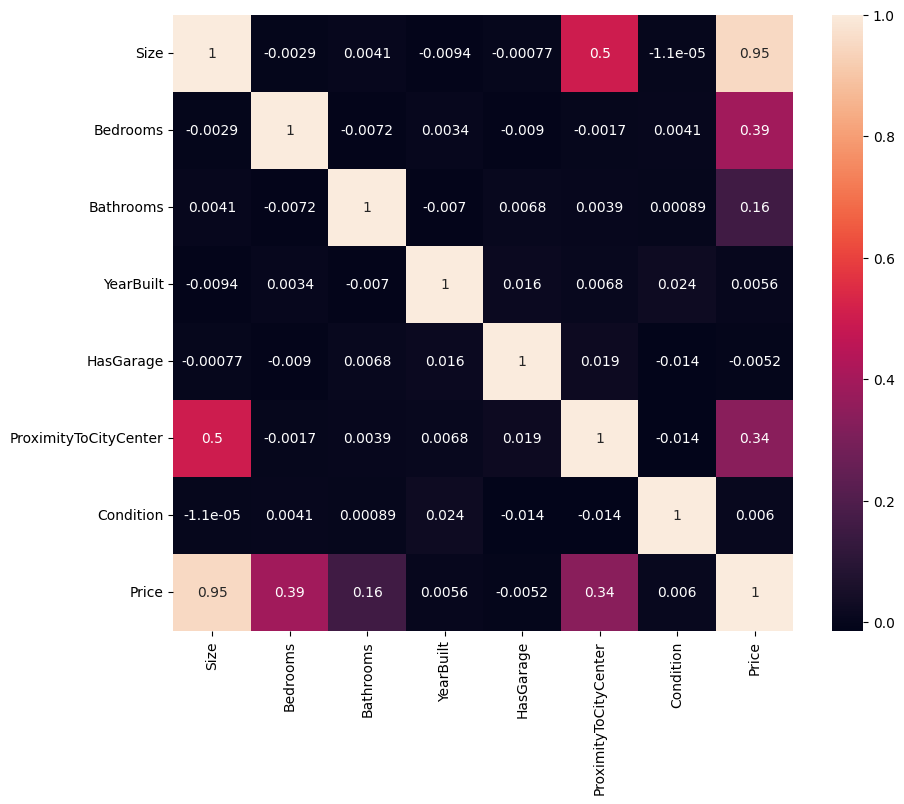

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(),annot=True)

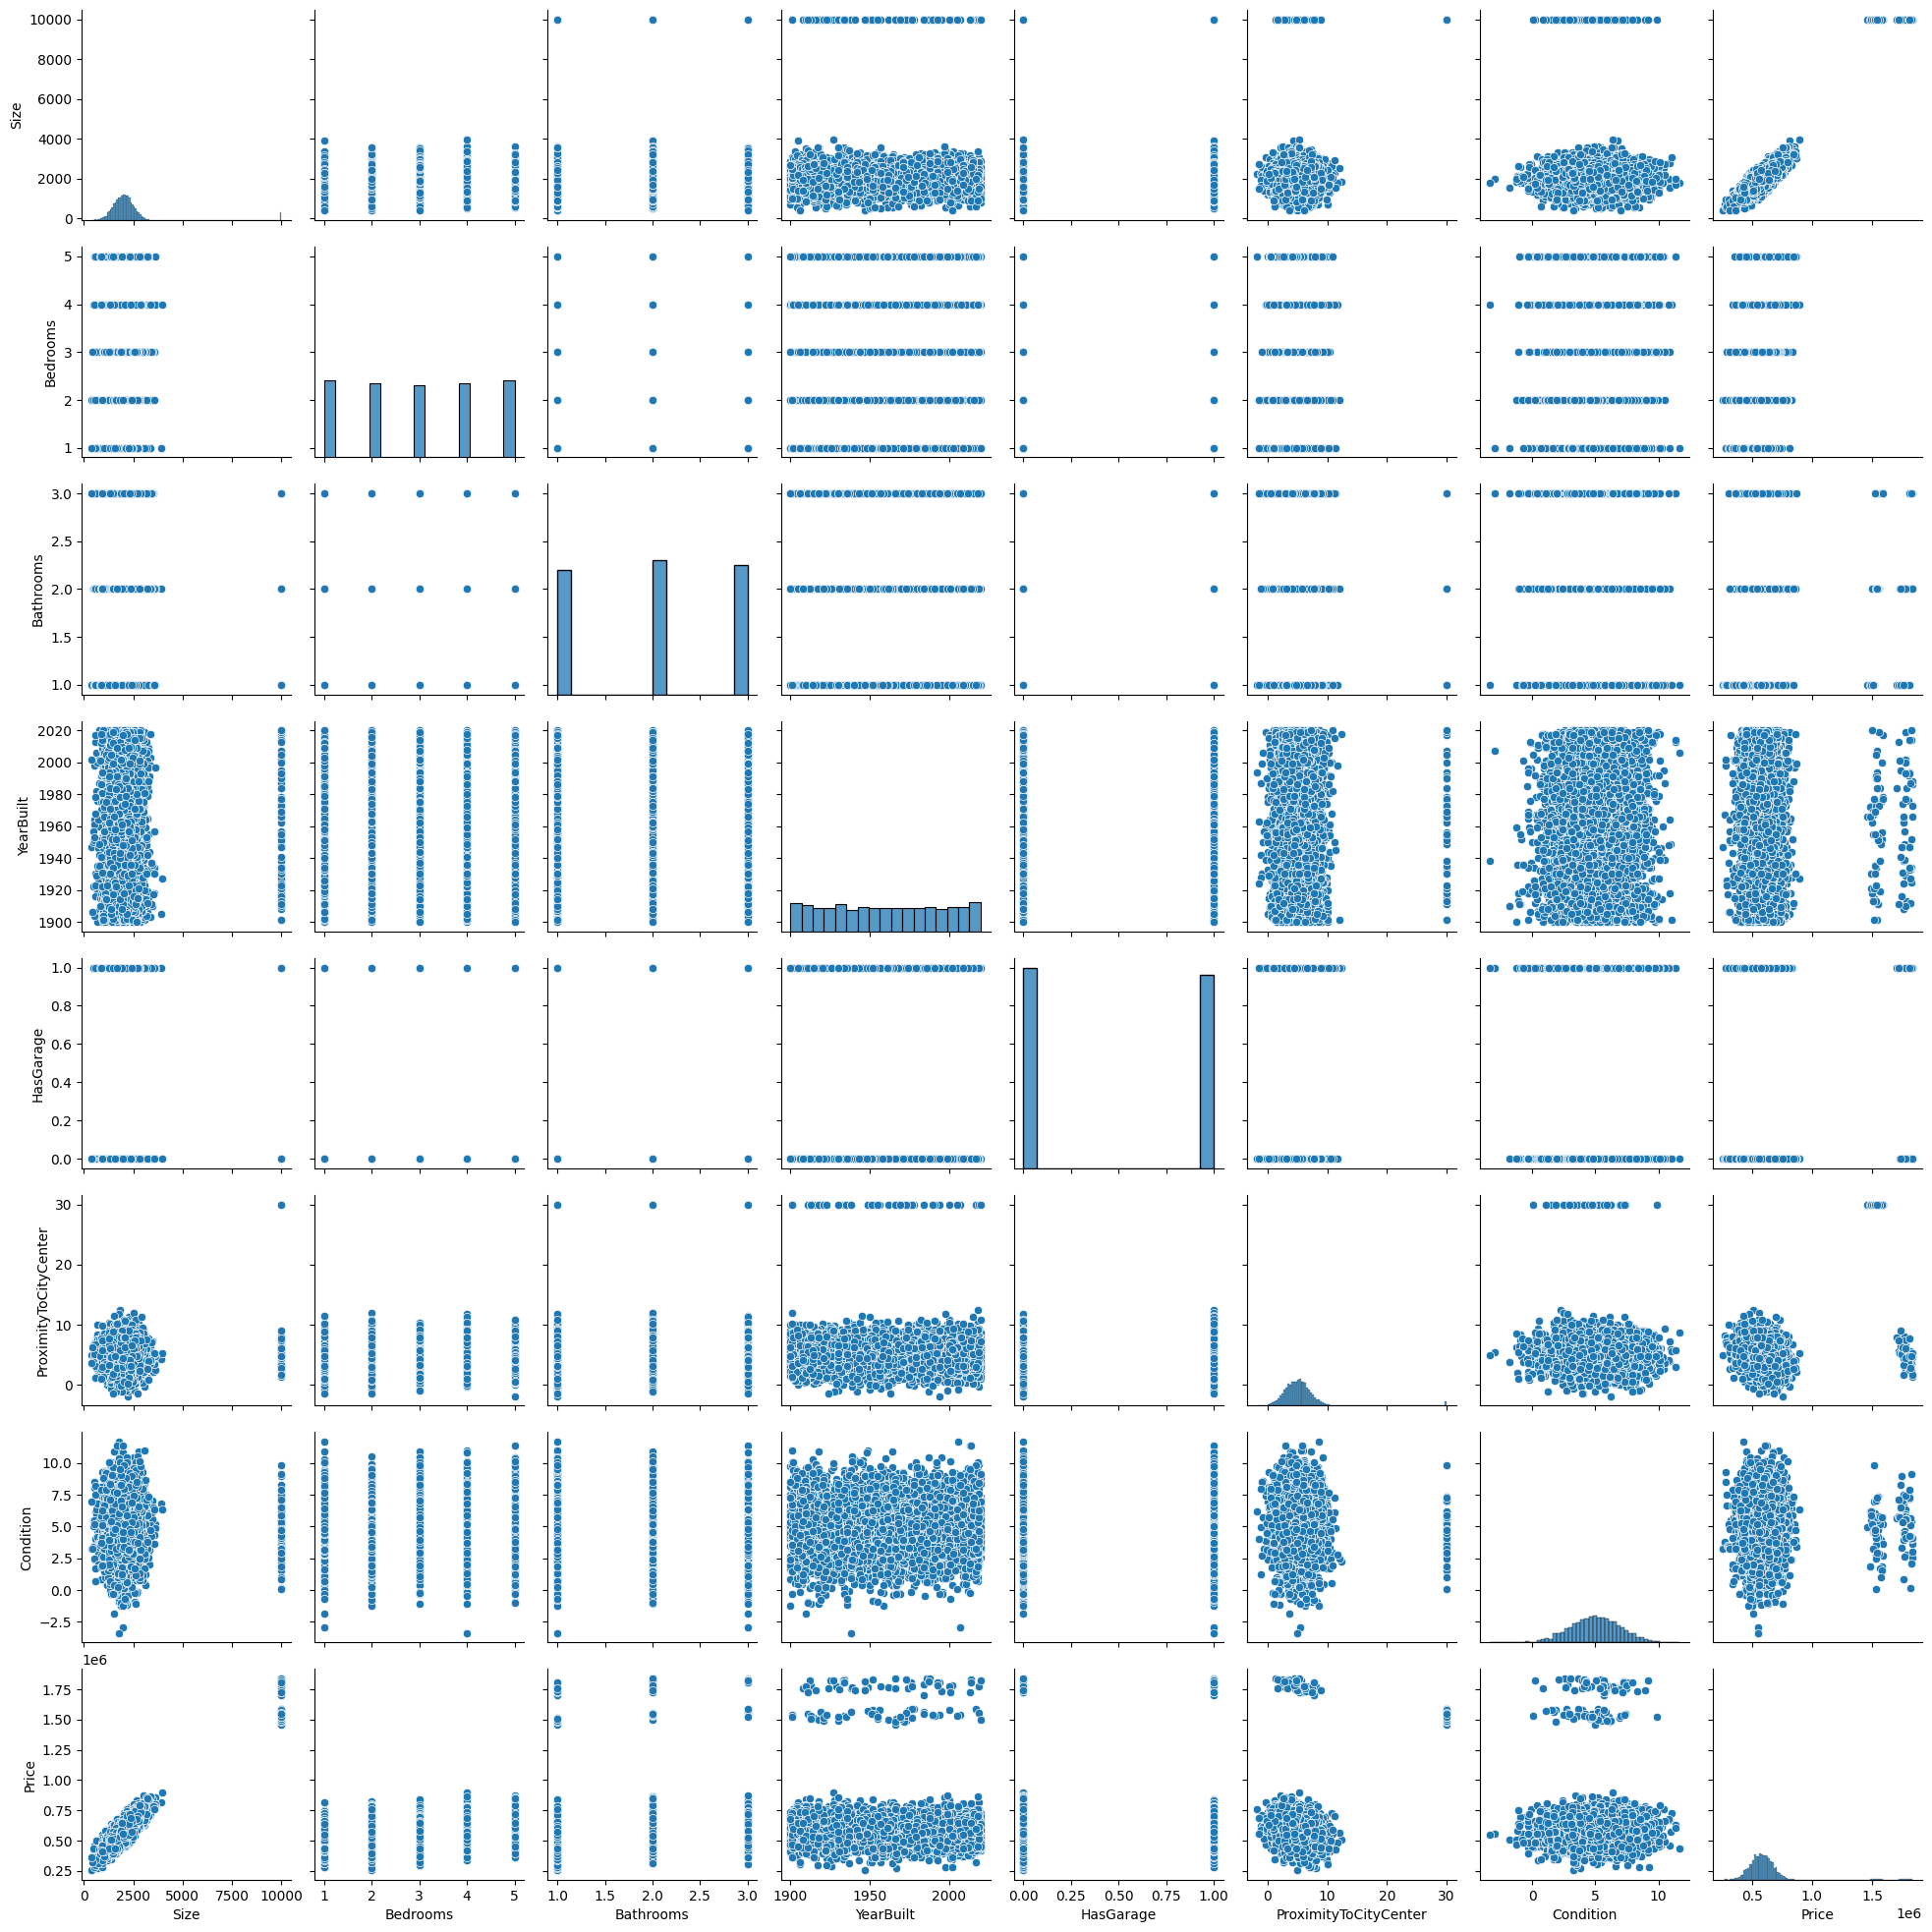

In [ ]:
sns.pairplot(df)

<Axes: ylabel='count'>

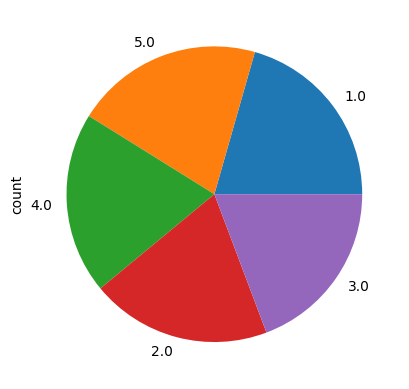

In [ ]:
df['Bedrooms'].value_counts().plot(kind='pie')

<Axes: xlabel='Bedrooms'>

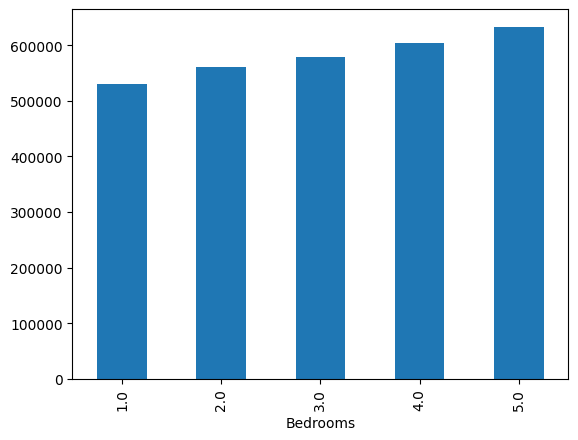

In [ ]:
df.groupby('Bedrooms').Price.mean().plot(kind='bar')

<Axes: xlabel='Bathrooms'>

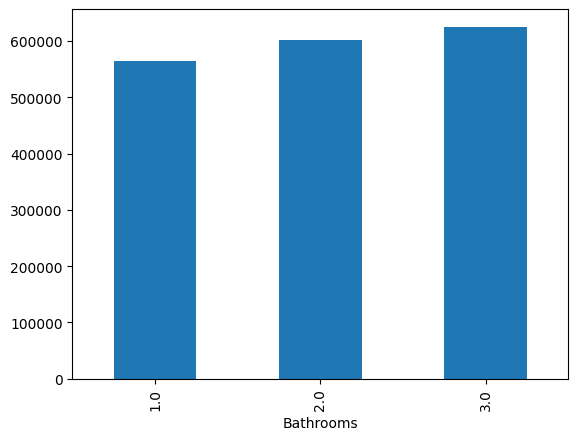

In [ ]:
df.groupby('Bathrooms').Price.mean().plot(kind='bar')

In [ ]:
data.groupby('LuxuryRating').Price.mean()

LuxuryRating
High      598228.459803
Low       608614.851966
Medium    601997.257821
Name: Price, dtype: float64

<Axes: xlabel='LuxuryRating'>

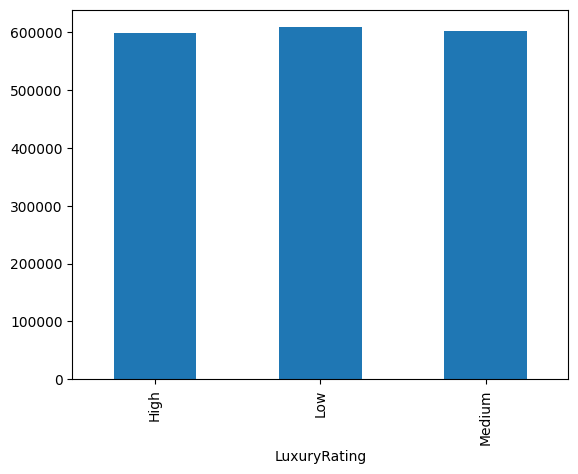

In [ ]:
data.groupby('LuxuryRating').Price.mean().plot(kind='bar')

In [ ]:
data.groupby(['Bedrooms','Neighborhood','Bathrooms']).Price.mean().to_csv('result.csv')

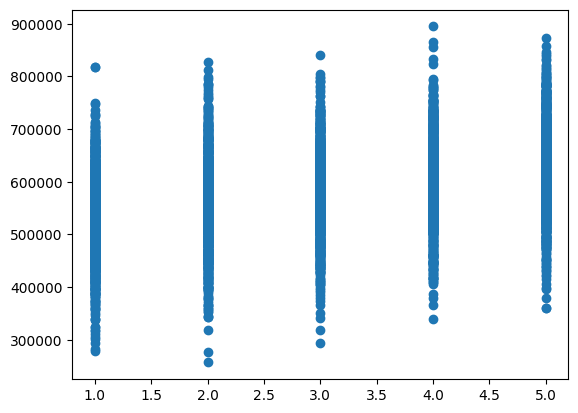

In [ ]:
plt.scatter(data['Bedrooms'],data['Price'])
plt.savefig('bathrooms_price_scatter.png')

<Axes: xlabel='Size', ylabel='Price'>

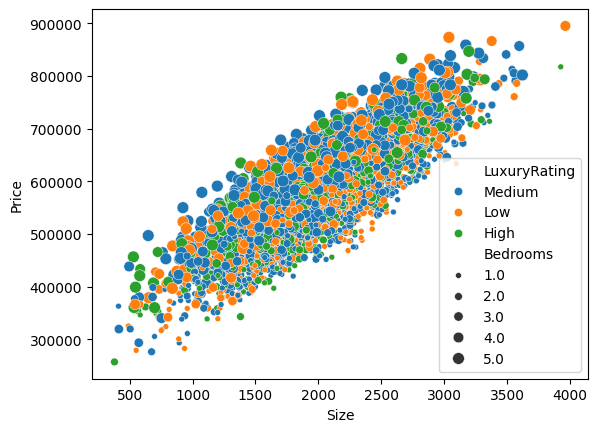

In [ ]:
sns.scatterplot(x=data.Size,y=data.Price,hue=data.LuxuryRating,size=data.Bedrooms)

In [ ]:
df.isna().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
YearBuilt                  0
HasGarage                250
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

In [ ]:
df.shape

(5000, 8)

In [ ]:
df['Bedrooms'].mode()[0]

np.float64(1.0)

In [ ]:
data['Bedrooms'].mean()

np.float64(3.000888888888889)

In [ ]:
data['Bedrooms'].mode()

0    1.0
Name: Bedrooms, dtype: float64

In [ ]:
df['Bedrooms'].fillna(df['Bedrooms'].mode()[0],inplace=True)
df['Bathrooms'].fillna(df['Bathrooms'].mode()[0],inplace=True)
df['HasGarage'].fillna(df['HasGarage'].mode()[0],inplace=True)

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_26819/3357751222.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HasGarage'].fillna(df['HasGarage'].mode()[0],inplace=True)


In [ ]:
df.isna().sum()

Size                     0
Bedrooms                 0
Bathrooms                0
YearBuilt                0
HasGarage                0
ProximityToCityCenter    0
Condition                0
Price                    0
dtype: int64

In [ ]:
df['Bedrooms'].mode()

0    1.0
Name: Bedrooms, dtype: float64

In [ ]:
df[df.Size>9000]

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
0     10000.0       1.0        2.0       1973        0.0   
50    10000.0       1.0        3.0       1994        0.0   
100   10000.0       1.0        1.0       1972        0.0   
150   10000.0       1.0        2.0       1984        0.0   
200   10000.0       1.0        3.0       1952        0.0   
...       ...       ...        ...        ...        ...   
4750  10000.0       1.0        3.0       1933        1.0   
4800  10000.0       1.0        2.0       1969        0.0   
4850  10000.0       1.0        3.0       2020        1.0   
4900  10000.0       1.0        2.0       1984        0.0   
4950  10000.0       1.0        2.0       1934        1.0   

      ProximityToCityCenter  Condition         Price  
0                 30.000000   5.488515  1.488980e+06  
50                 3.739812   5.718787  1.810740e+06  
100               30.000000   6.165112  1.485484e+06  
150                4.241420   2.790789  1.788134e+06  
200               30.000000   1.862397  1.579726e+06  
...                     ...        ...           ...  
4750               4.767361   4.295493  1.809633e+06  
4800              30.000000   4.749585  1.522276e+06  
4850               4.780006   9.161828  1.823190e+06  
4900              30.000000   2.973680  1.543994e+06  
4950               7.681799   7.899598  1.806274e+06  

[100 rows x 8 columns]

In [ ]:
data[df['Size']>9000]

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0     10000.0       NaN        NaN   Commercial       1973        NaN   
50    10000.0       NaN        3.0       Suburb       1994        0.0   
100   10000.0       NaN        1.0     Downtown       1972        NaN   
150   10000.0       NaN        NaN        Rural       1984        0.0   
200   10000.0       NaN        3.0     Downtown       1952        NaN   
...       ...       ...        ...          ...        ...        ...   
4750  10000.0       NaN        3.0   Commercial       1933        1.0   
4800  10000.0       NaN        NaN   Commercial       1969        NaN   
4850  10000.0       NaN        3.0        Rural       2020        1.0   
4900  10000.0       NaN        2.0   Industrial       1984        NaN   
4950  10000.0       NaN        NaN     Downtown       1934        1.0   

     LuxuryRating  ProximityToCityCenter  Condition         Price  
0          Medium              30.000000   5.488515  1.488980e+06  
50         Medium               3.739812   5.718787  1.810740e+06  
100           Low              30.000000   6.165112  1.485484e+06  
150          High               4.241420   2.790789  1.788134e+06  
200           Low              30.000000   1.862397  1.579726e+06  
...           ...                    ...        ...           ...  
4750       Medium               4.767361   4.295493  1.809633e+06  
4800          Low              30.000000   4.749585  1.522276e+06  
4850          Low               4.780006   9.161828  1.823190e+06  
4900          Low              30.000000   2.973680  1.543994e+06  
4950       Medium               7.681799   7.899598  1.806274e+06  

[100 rows x 10 columns]

In [ ]:
data1 = df[data.Size<9000]

In [ ]:
data1

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
1     1930.867849       4.0        3.0       1928        0.0   
2     2323.844269       5.0        1.0       2009        0.0   
3     2761.514928       4.0        2.0       1962        1.0   
4     1882.923313       3.0        2.0       2001        0.0   
5     1882.931522       5.0        2.0       1983        1.0   
...           ...       ...        ...        ...        ...   
4995  1975.517485       2.0        2.0       1948        0.0   
4996  2355.705290       4.0        2.0       1936        0.0   
4997  3556.455101       2.0        1.0       1930        0.0   
4998  2404.018095       2.0        1.0       1930        1.0   
4999  1575.967201       1.0        1.0       1958        0.0   

      ProximityToCityCenter  Condition          Price  
1                  1.802602   7.003753  638342.797067  
2                  7.573310   3.090808  585864.151414  
3                  2.761676   5.355583  714818.822600  
4                  5.537443   3.721960  563705.765490  
5                  4.337815   3.451325  623286.052338  
...                     ...        ...            ...  
4995               4.502521   4.562272  557243.493794  
4996               3.156012   4.543997  689191.716201  
4997               5.276355   6.338340  760530.272865  
4998               6.526272   6.879909  575174.844742  
4999               4.717330   4.821827  431929.064329  

[4900 rows x 8 columns]

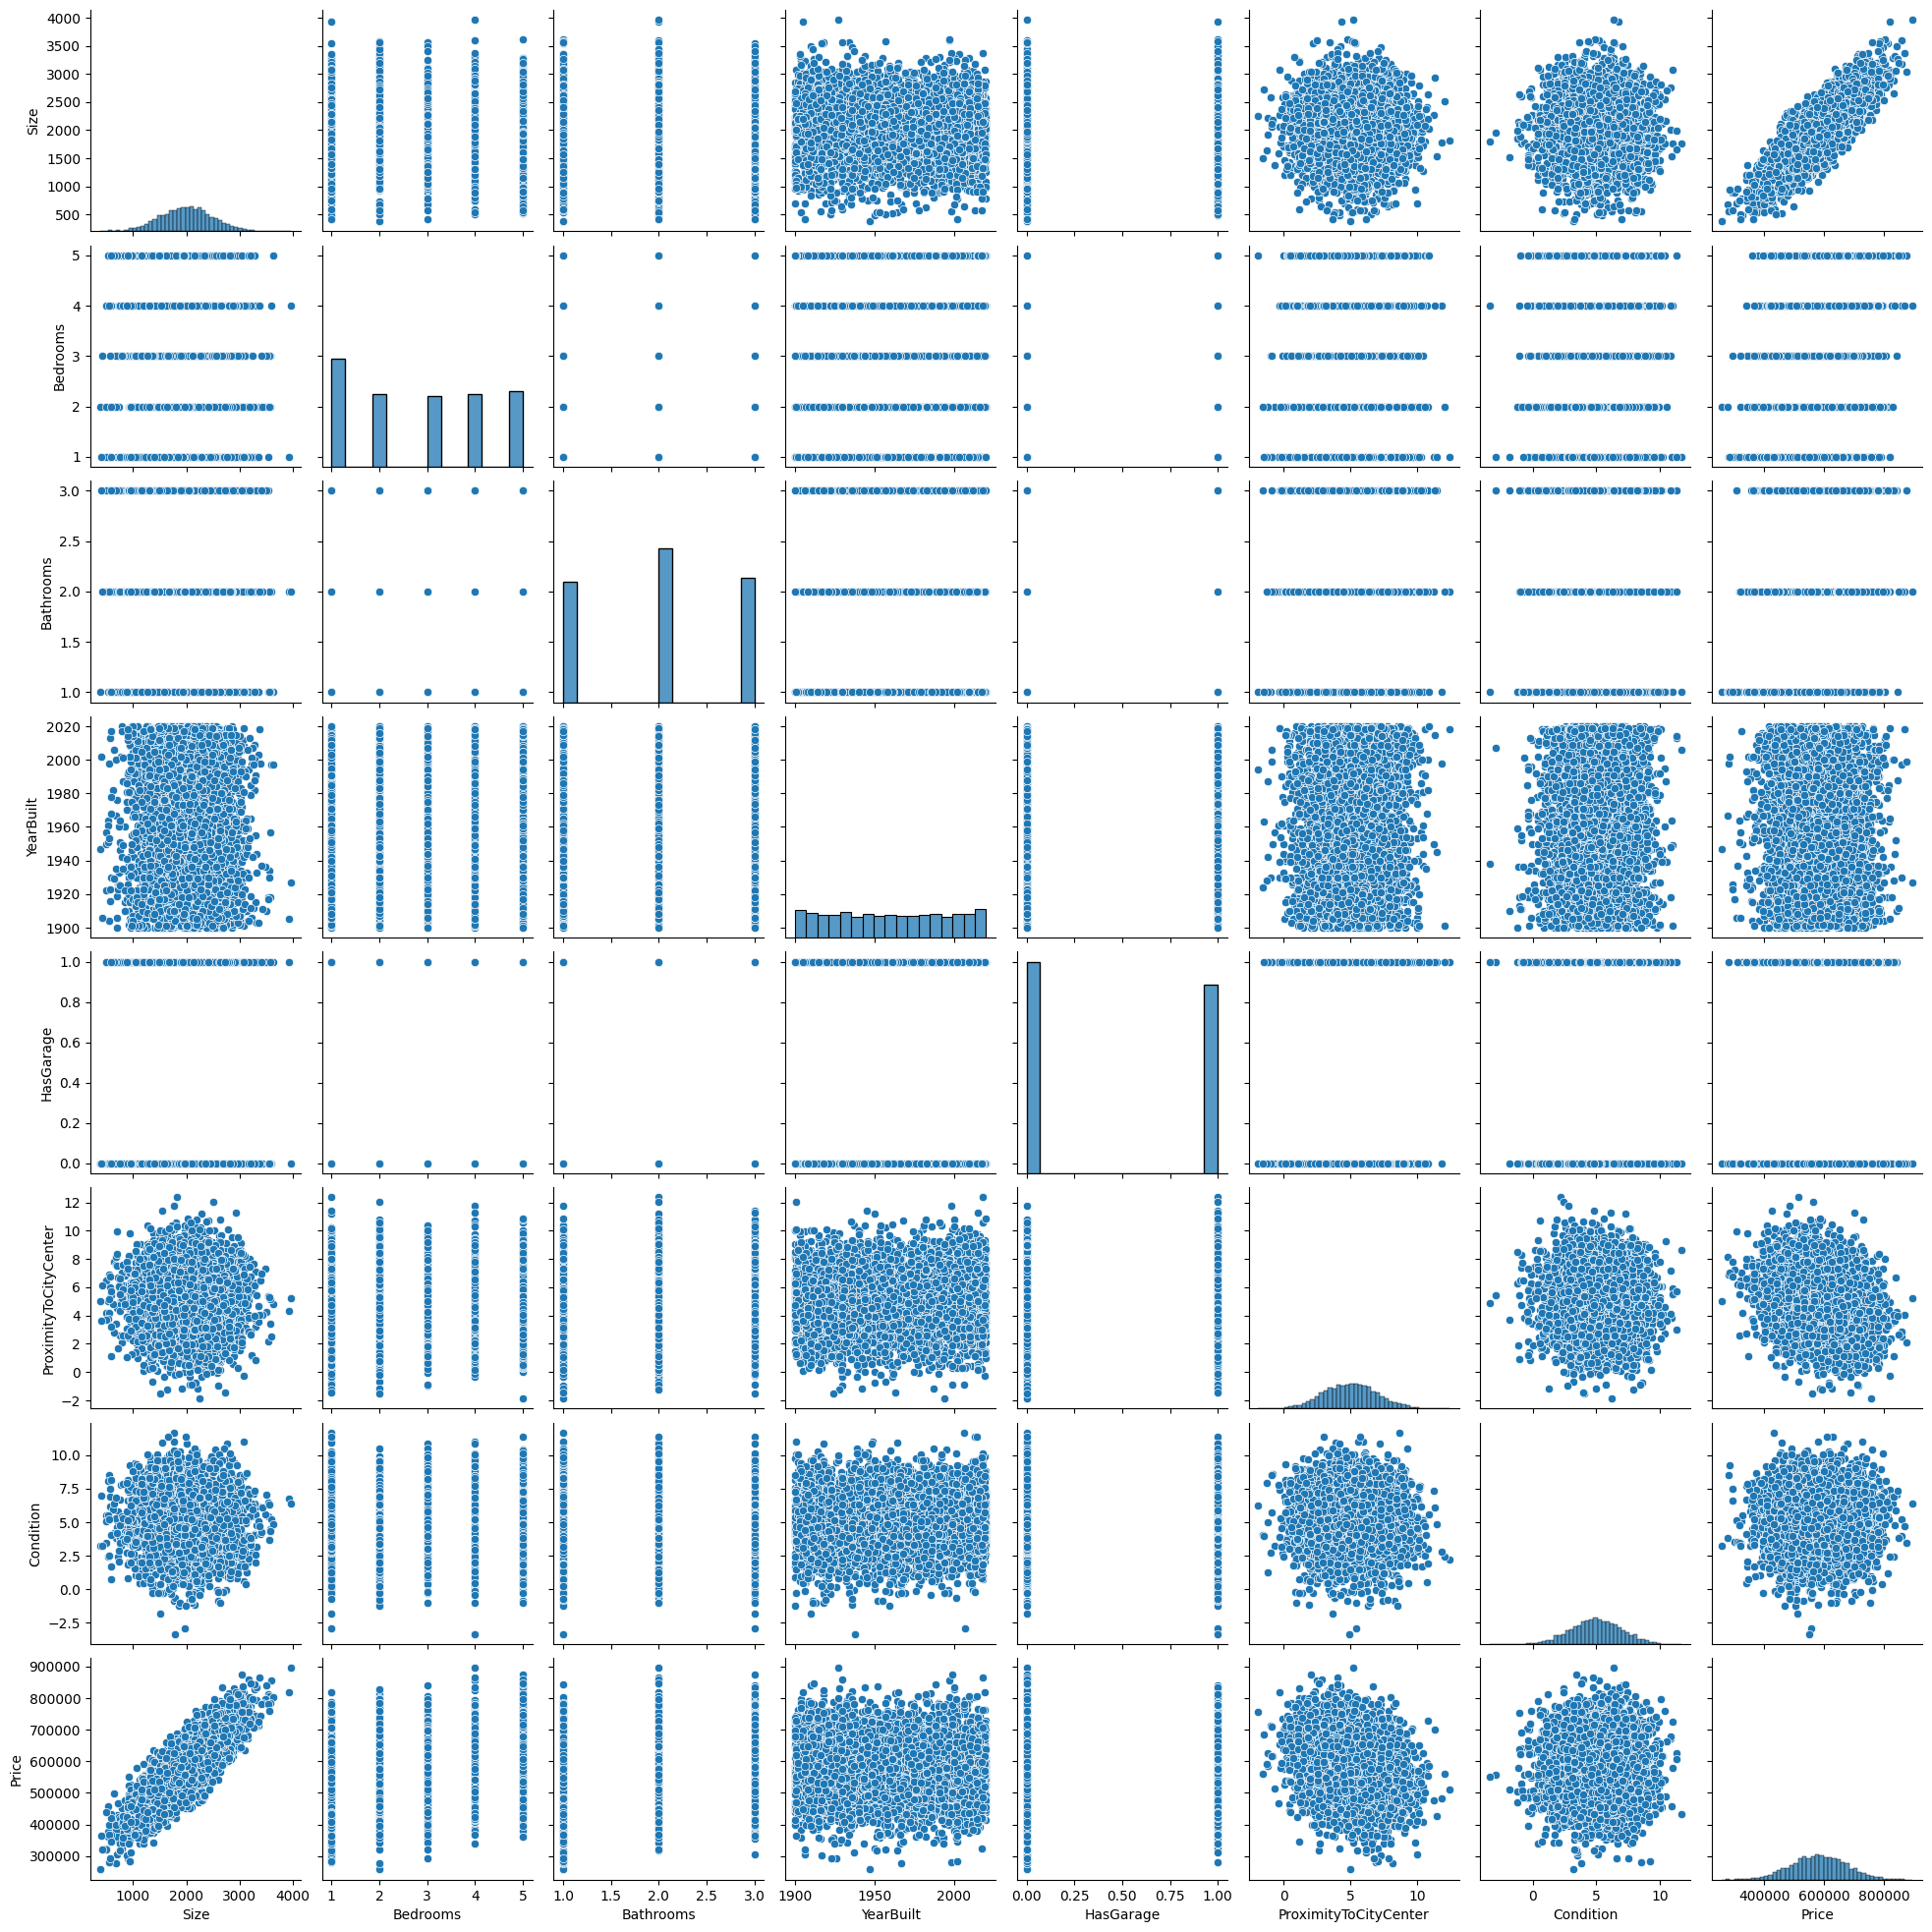

In [ ]:
sns.pairplot(data1)

In [ ]:
df.corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                   1.000000 -0.160944   0.002972  -0.009397  -0.060455   
Bedrooms              -0.160944  1.000000  -0.010573   0.000525   0.048223   
Bathrooms              0.002972 -0.010573   1.000000  -0.006773   0.007577   
YearBuilt             -0.009397  0.000525  -0.006773   1.000000   0.015408   
HasGarage             -0.060455  0.048223   0.007577   0.015408   1.000000   
ProximityToCityCenter  0.498816 -0.092265   0.003091   0.006787  -0.061265   
Condition             -0.000011  0.007156   0.000908   0.024348  -0.009600   
Price                  0.952369  0.024742   0.134377   0.005592  -0.053504   

                       ProximityToCityCenter  Condition     Price  
Size                                0.498816  -0.000011  0.952369  
Bedrooms                           -0.092265   0.007156  0.024742  
Bathrooms                           0.003091   0.000908  0.134377  
YearBuilt                           0.006787   0.024348  0.005592  
HasGarage                          -0.061265  -0.009600 -0.053504  
ProximityToCityCenter               1.000000  -0.014041  0.338437  
Condition                          -0.014041   1.000000  0.005978  
Price                               0.338437   0.005978  1.000000

In [ ]:
data1.corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                   1.000000 -0.005392  -0.008952  -0.022361  -0.002318   
Bedrooms              -0.005392  1.000000  -0.009538   0.000449   0.037862   
Bathrooms             -0.008952 -0.009538   1.000000  -0.006997   0.009844   
YearBuilt             -0.022361  0.000449  -0.006997   1.000000   0.013425   
HasGarage             -0.002318  0.037862   0.009844   0.013425   1.000000   
ProximityToCityCenter -0.003365  0.004071  -0.005309   0.017780   0.018981   
Condition              0.006365  0.006838   0.005548   0.023092  -0.015399   
Price                  0.828044  0.347270   0.251630   0.009991  -0.009567   

                       ProximityToCityCenter  Condition     Price  
Size                               -0.003365   0.006365  0.828044  
Bedrooms                            0.004071   0.006838  0.347270  
Bathrooms                          -0.005309   0.005548  0.251630  
YearBuilt                           0.017780   0.023092  0.009991  
HasGarage                           0.018981  -0.015399 -0.009567  
ProximityToCityCenter               1.000000  -0.000024 -0.229183  
Condition                          -0.000024   1.000000  0.013867  
Price                              -0.229183   0.013867  1.000000

In [ ]:
data[num_cols].corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                   1.000000 -0.002868   0.004128  -0.009397  -0.000767   
Bedrooms              -0.002868  1.000000  -0.007199   0.003371  -0.009011   
Bathrooms              0.004128 -0.007199   1.000000  -0.007046   0.006780   
YearBuilt             -0.009397  0.003371  -0.007046   1.000000   0.016489   
HasGarage             -0.000767 -0.009011   0.006780   0.016489   1.000000   
ProximityToCityCenter  0.498816 -0.001710   0.003935   0.006787   0.019281   
Condition             -0.000011  0.004088   0.000893   0.024348  -0.013893   
Price                  0.952369  0.392132   0.156912   0.005592  -0.005184   

                       ProximityToCityCenter  Condition     Price  
Size                                0.498816  -0.000011  0.952369  
Bedrooms                           -0.001710   0.004088  0.392132  
Bathrooms                           0.003935   0.000893  0.156912  
YearBuilt                           0.006787   0.024348  0.005592  
HasGarage                           0.019281  -0.013893 -0.005184  
ProximityToCityCenter               1.000000  -0.014041  0.338437  
Condition                          -0.014041   1.000000  0.005978  
Price                               0.338437   0.005978  1.000000

In [ ]:
data1.head()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
1  1930.867849       4.0        3.0       1928        0.0   
2  2323.844269       5.0        1.0       2009        0.0   
3  2761.514928       4.0        2.0       1962        1.0   
4  1882.923313       3.0        2.0       2001        0.0   
5  1882.931522       5.0        2.0       1983        1.0   

   ProximityToCityCenter  Condition          Price  
1               1.802602   7.003753  638342.797067  
2               7.573310   3.090808  585864.151414  
3               2.761676   5.355583  714818.822600  
4               5.537443   3.721960  563705.765490  
5               4.337815   3.451325  623286.052338

In [ ]:
data1.shape

(4900, 8)

In [ ]:
data1.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'HasGarage',
       'ProximityToCityCenter', 'Condition', 'Price'],
      dtype='object')

In [ ]:
data[data1.columns]

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
0     10000.000000       NaN        NaN       1973        NaN   
1      1930.867849       4.0        3.0       1928        0.0   
2      2323.844269       5.0        1.0       2009        0.0   
3      2761.514928       4.0        2.0       1962        1.0   
4      1882.923313       3.0        2.0       2001        0.0   
...            ...       ...        ...        ...        ...   
4995   1975.517485       2.0        NaN       1948        0.0   
4996   2355.705290       4.0        2.0       1936        0.0   
4997   3556.455101       2.0        1.0       1930        0.0   
4998   2404.018095       2.0        1.0       1930        1.0   
4999   1575.967201       1.0        1.0       1958        0.0   

      ProximityToCityCenter  Condition         Price  
0                 30.000000   5.488515  1.488980e+06  
1                  1.802602   7.003753  6.383428e+05  
2                  7.573310   3.090808  5.858642e+05  
3                  2.761676   5.355583  7.148188e+05  
4                  5.537443   3.721960  5.637058e+05  
...                     ...        ...           ...  
4995               4.502521   4.562272  5.572435e+05  
4996               3.156012   4.543997  6.891917e+05  
4997               5.276355   6.338340  7.605303e+05  
4998               6.526272   6.879909  5.751748e+05  
4999               4.717330   4.821827  4.319291e+05  

[5000 rows x 8 columns]

In [ ]:
data.isna().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
Neighborhood               0
YearBuilt                  0
HasGarage                250
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

In [ ]:
data1

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
1     1930.867849       4.0        3.0       1928        0.0   
2     2323.844269       5.0        1.0       2009        0.0   
3     2761.514928       4.0        2.0       1962        1.0   
4     1882.923313       3.0        2.0       2001        0.0   
5     1882.931522       5.0        2.0       1983        1.0   
...           ...       ...        ...        ...        ...   
4995  1975.517485       2.0        2.0       1948        0.0   
4996  2355.705290       4.0        2.0       1936        0.0   
4997  3556.455101       2.0        1.0       1930        0.0   
4998  2404.018095       2.0        1.0       1930        1.0   
4999  1575.967201       1.0        1.0       1958        0.0   

      ProximityToCityCenter  Condition          Price  
1                  1.802602   7.003753  638342.797067  
2                  7.573310   3.090808  585864.151414  
3                  2.761676   5.355583  714818.822600  
4                  5.537443   3.721960  563705.765490  
5                  4.337815   3.451325  623286.052338  
...                     ...        ...            ...  
4995               4.502521   4.562272  557243.493794  
4996               3.156012   4.543997  689191.716201  
4997               5.276355   6.338340  760530.272865  
4998               6.526272   6.879909  575174.844742  
4999               4.717330   4.821827  431929.064329  

[4900 rows x 8 columns]

In [ ]:
data1.isna().sum()

Size                     0
Bedrooms                 0
Bathrooms                0
YearBuilt                0
HasGarage                0
ProximityToCityCenter    0
Condition                0
Price                    0
dtype: int64

In [ ]:
data1['HouseAge']=2024 - data1['YearBuilt']

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_26819/3754381917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['HouseAge']=2024 - data1['YearBuilt']


In [ ]:
data1.head()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
1  1930.867849       4.0        3.0       1928        0.0   
2  2323.844269       5.0        1.0       2009        0.0   
3  2761.514928       4.0        2.0       1962        1.0   
4  1882.923313       3.0        2.0       2001        0.0   
5  1882.931522       5.0        2.0       1983        1.0   

   ProximityToCityCenter  Condition          Price  HouseAge  
1               1.802602   7.003753  638342.797067        96  
2               7.573310   3.090808  585864.151414        15  
3               2.761676   5.355583  714818.822600        62  
4               5.537443   3.721960  563705.765490        23  
5               4.337815   3.451325  623286.052338        41

In [ ]:
data1.HouseAge.head()

1    96
2    15
3    62
4    23
5    41
Name: HouseAge, dtype: int64

In [ ]:
data1.HouseAge

1       96
2       15
3       62
4       23
5       41
        ..
4995    76
4996    88
4997    94
4998    94
4999    66
Name: HouseAge, Length: 4900, dtype: int64

In [ ]:
data1.corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                   1.000000 -0.005392  -0.008952  -0.022361  -0.002318   
Bedrooms              -0.005392  1.000000  -0.009538   0.000449   0.037862   
Bathrooms             -0.008952 -0.009538   1.000000  -0.006997   0.009844   
YearBuilt             -0.022361  0.000449  -0.006997   1.000000   0.013425   
HasGarage             -0.002318  0.037862   0.009844   0.013425   1.000000   
ProximityToCityCenter -0.003365  0.004071  -0.005309   0.017780   0.018981   
Condition              0.006365  0.006838   0.005548   0.023092  -0.015399   
Price                  0.828044  0.347270   0.251630   0.009991  -0.009567   
HouseAge               0.022361 -0.000449   0.006997  -1.000000  -0.013425   

                       ProximityToCityCenter  Condition     Price  HouseAge  
Size                               -0.003365   0.006365  0.828044  0.022361  
Bedrooms                            0.004071   0.006838  0.347270 -0.000449  
Bathrooms                          -0.005309   0.005548  0.251630  0.006997  
YearBuilt                           0.017780   0.023092  0.009991 -1.000000  
HasGarage                           0.018981  -0.015399 -0.009567 -0.013425  
ProximityToCityCenter               1.000000  -0.000024 -0.229183 -0.017780  
Condition                          -0.000024   1.000000  0.013867 -0.023092  
Price                              -0.229183   0.013867  1.000000 -0.009991  
HouseAge                           -0.017780  -0.023092 -0.009991  1.000000

In [ ]:
data1=data1[['Size','Bedrooms','Bathrooms','YearBuilt','HouseAge','HasGarage','ProximityToCityCenter','Condition','Price']]

In [ ]:
data1.shape

(4900, 9)

In [ ]:
data1.corr()

Size  Bedrooms  Bathrooms  YearBuilt  HouseAge  \
Size                   1.000000 -0.005392  -0.008952  -0.022361  0.022361   
Bedrooms              -0.005392  1.000000  -0.009538   0.000449 -0.000449   
Bathrooms             -0.008952 -0.009538   1.000000  -0.006997  0.006997   
YearBuilt             -0.022361  0.000449  -0.006997   1.000000 -1.000000   
HouseAge               0.022361 -0.000449   0.006997  -1.000000  1.000000   
HasGarage             -0.002318  0.037862   0.009844   0.013425 -0.013425   
ProximityToCityCenter -0.003365  0.004071  -0.005309   0.017780 -0.017780   
Condition              0.006365  0.006838   0.005548   0.023092 -0.023092   
Price                  0.828044  0.347270   0.251630   0.009991 -0.009991   

                       HasGarage  ProximityToCityCenter  Condition     Price  
Size                   -0.002318              -0.003365   0.006365  0.828044  
Bedrooms                0.037862               0.004071   0.006838  0.347270  
Bathrooms               0.009844              -0.005309   0.005548  0.251630  
YearBuilt               0.013425               0.017780   0.023092  0.009991  
HouseAge               -0.013425              -0.017780  -0.023092 -0.009991  
HasGarage               1.000000               0.018981  -0.015399 -0.009567  
ProximityToCityCenter   0.018981               1.000000  -0.000024 -0.229183  
Condition              -0.015399              -0.000024   1.000000  0.013867  
Price                  -0.009567              -0.229183   0.013867  1.000000

In [ ]:
data1.drop(columns='YearBuilt',inplace=True)

In [ ]:
data1.isna().sum()

Size                     0
Bedrooms                 0
Bathrooms                0
HouseAge                 0
HasGarage                0
ProximityToCityCenter    0
Condition                0
Price                    0
dtype: int64

In [ ]:
data.head()

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0  10000.000000       NaN        NaN   Commercial       1973        NaN   
1   1930.867849       4.0        3.0   Industrial       1928        0.0   
2   2323.844269       5.0        1.0   Commercial       2009        0.0   
3   2761.514928       4.0        2.0   Industrial       1962        1.0   
4   1882.923313       3.0        2.0       Suburb       2001        0.0   

  LuxuryRating  ProximityToCityCenter  Condition         Price  
0       Medium              30.000000   5.488515  1.488980e+06  
1       Medium               1.802602   7.003753  6.383428e+05  
2       Medium               7.573310   3.090808  5.858642e+05  
3          Low               2.761676   5.355583  7.148188e+05  
4       Medium               5.537443   3.721960  5.637058e+05

In [ ]:
data['LuxuryRating'].value_counts()

LuxuryRating
Medium    2498
Low       1465
High       937
Name: count, dtype: int64

In [ ]:
mapping={'Low':1,'Medium':2,'High':3}

In [ ]:
mapping

{'Low': 1, 'Medium': 2, 'High': 3}

In [ ]:
data['LuxuryRating']=data['LuxuryRating'].map(mapping)

In [ ]:
data

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  LuxuryRating  \
0    10000.00      1.00       2.00       1973       0.00             2   
1     1930.87      4.00       3.00       1928       0.00             2   
2     2323.84      5.00       1.00       2009       0.00             2   
3     2761.51      4.00       2.00       1962       1.00             1   
4     1882.92      3.00       2.00       2001       0.00             2   
...       ...       ...        ...        ...        ...           ...   
4995  1975.52      2.00       2.00       1948       0.00             2   
4996  2355.71      4.00       2.00       1936       0.00             1   
4997  3556.46      2.00       1.00       1930       0.00             1   
4998  2404.02      2.00       1.00       1930       1.00             1   
4999  1575.97      1.00       1.00       1958       0.00             1   

      ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
0                     30.00       5.49        51                        1   
1                      1.80       7.00        96                        0   
2                      7.57       3.09        15                        1   
3                      2.76       5.36        62                        0   
4                      5.54       3.72        23                        0   
...                     ...        ...       ...                      ...   
4995                   4.50       4.56        76                        0   
4996                   3.16       4.54        88                        1   
4997                   5.28       6.34        94                        0   
4998                   6.53       6.88        94                        0   
4999                   4.72       4.82        66                        0   

      Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                         0                        0                   0   
1                         0                        1                   0   
2                         0                        0                   0   
3                         0                        1                   0   
4                         0                        0                   0   
...                     ...                      ...                 ...   
4995                      0                        1                   0   
4996                      0                        0                   0   
4997                      0                        1                   0   
4998                      0                        0                   0   
4999                      1                        0                   0   

      Neighborhood_Suburb      Price  
0                       0 1488980.07  
1                       0  638342.80  
2                       0  585864.15  
3                       0  714818.82  
4                       1  563705.77  
...                   ...        ...  
4995                    0  557243.49  
4996                    0  689191.72  
4997                    0  760530.27  
4998                    1  575174.84  
4999                    0  431929.06  

[5000 rows x 15 columns]

In [ ]:
data.head()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  LuxuryRating  \
0 10000.00      1.00       2.00       1973       0.00             2   
1  1930.87      4.00       3.00       1928       0.00             2   
2  2323.84      5.00       1.00       2009       0.00             2   
3  2761.51      4.00       2.00       1962       1.00             1   
4  1882.92      3.00       2.00       2001       0.00             2   

   ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
0                  30.00       5.49        51                        1   
1                   1.80       7.00        96                        0   
2                   7.57       3.09        15                        1   
3                   2.76       5.36        62                        0   
4                   5.54       3.72        23                        0   

   Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                      0                        0                   0   
1                      0                        1                   0   
2                      0                        0                   0   
3                      0                        1                   0   
4                      0                        0                   0   

   Neighborhood_Suburb      Price  
0                    0 1488980.07  
1                    0  638342.80  
2                    0  585864.15  
3                    0  714818.82  
4                    1  563705.77

In [ ]:
data['Neighborhood'].value_counts()

KeyError: 'Neighborhood'

In [ ]:
data = pd.get_dummies(data,columns=['Neighborhood'],dtype='int')

In [ ]:
data.head()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  LuxuryRating  \
0 10000.00      1.00       2.00       1973       0.00             2   
1  1930.87      4.00       3.00       1928       0.00             2   
2  2323.84      5.00       1.00       2009       0.00             2   
3  2761.51      4.00       2.00       1962       1.00             1   
4  1882.92      3.00       2.00       2001       0.00             2   

   ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
0                  30.00       5.49        51                        1   
1                   1.80       7.00        96                        0   
2                   7.57       3.09        15                        1   
3                   2.76       5.36        62                        0   
4                   5.54       3.72        23                        0   

   Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                      0                        0                   0   
1                      0                        1                   0   
2                      0                        0                   0   
3                      0                        1                   0   
4                      0                        0                   0   

   Neighborhood_Suburb      Price  
0                    0 1488980.07  
1                    0  638342.80  
2                    0  585864.15  
3                    0  714818.82  
4                    1  563705.77

In [ ]:
data.isna().sum()

Size                       0
Bedrooms                   0
Bathrooms                  0
YearBuilt                  0
HasGarage                  0
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
HouseAge                   0
Neighborhood_Commercial    0
Neighborhood_Downtown      0
Neighborhood_Industrial    0
Neighborhood_Rural         0
Neighborhood_Suburb        0
Price                      0
dtype: int64

In [ ]:
data.Bedrooms.fillna(data.Bedrooms.mode()[0],inplace=True)
data.Bathrooms.fillna(data.Bathrooms.mode()[0],inplace=True)
data.HasGarage.fillna(data.HasGarage.mode()[0],inplace=True)

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_89207/1266526399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Bedrooms.fillna(data.Bedrooms.mode()[0],inplace=True)
/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_89207/1266526399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [ ]:
data.head()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  LuxuryRating  \
0 10000.00      1.00       2.00       1973       0.00             2   
1  1930.87      4.00       3.00       1928       0.00             2   
2  2323.84      5.00       1.00       2009       0.00             2   
3  2761.51      4.00       2.00       1962       1.00             1   
4  1882.92      3.00       2.00       2001       0.00             2   

   ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
0                  30.00       5.49        51                        1   
1                   1.80       7.00        96                        0   
2                   7.57       3.09        15                        1   
3                   2.76       5.36        62                        0   
4                   5.54       3.72        23                        0   

   Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                      0                        0                   0   
1                      0                        1                   0   
2                      0                        0                   0   
3                      0                        1                   0   
4                      0                        0                   0   

   Neighborhood_Suburb      Price  
0                    0 1488980.07  
1                    0  638342.80  
2                    0  585864.15  
3                    0  714818.82  
4                    1  563705.77

In [ ]:
data.isna().sum()

Size                       0
Bedrooms                   0
Bathrooms                  0
YearBuilt                  0
HasGarage                  0
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
HouseAge                   0
Neighborhood_Commercial    0
Neighborhood_Downtown      0
Neighborhood_Industrial    0
Neighborhood_Rural         0
Neighborhood_Suburb        0
Price                      0
dtype: int64

In [ ]:
data=data[data['Size']<9000]

In [ ]:
data

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage LuxuryRating  \
0    10000.00      1.00       2.00       1973       0.00       Medium   
1     1930.87      4.00       3.00       1928       0.00       Medium   
2     2323.84      5.00       1.00       2009       0.00       Medium   
3     2761.51      4.00       2.00       1962       1.00          Low   
4     1882.92      3.00       2.00       2001       0.00       Medium   
...       ...       ...        ...        ...        ...          ...   
4995  1975.52      2.00       2.00       1948       0.00       Medium   
4996  2355.71      4.00       2.00       1936       0.00          Low   
4997  3556.46      2.00       1.00       1930       0.00          Low   
4998  2404.02      2.00       1.00       1930       1.00          Low   
4999  1575.97      1.00       1.00       1958       0.00          Low   

      ProximityToCityCenter  Condition      Price  Neighborhood_Commercial  \
0                     30.00       5.49 1488980.07                        1   
1                      1.80       7.00  638342.80                        0   
2                      7.57       3.09  585864.15                        1   
3                      2.76       5.36  714818.82                        0   
4                      5.54       3.72  563705.77                        0   
...                     ...        ...        ...                      ...   
4995                   4.50       4.56  557243.49                        0   
4996                   3.16       4.54  689191.72                        1   
4997                   5.28       6.34  760530.27                        0   
4998                   6.53       6.88  575174.84                        0   
4999                   4.72       4.82  431929.06                        0   

      Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                         0                        0                   0   
1                         0                        1                   0   
2                         0                        0                   0   
3                         0                        1                   0   
4                         0                        0                   0   
...                     ...                      ...                 ...   
4995                      0                        1                   0   
4996                      0                        0                   0   
4997                      0                        1                   0   
4998                      0                        0                   0   
4999                      1                        0                   0   

      Neighborhood_Suburb  
0                       0  
1                       0  
2                       0  
3                       0  
4                       1  
...                   ...  
4995                    0  
4996                    0  
4997                    0  
4998                    1  
4999                    0  

[5000 rows x 14 columns]

In [ ]:
data['HouseAge'] = 2024 - data['YearBuilt'] 

In [ ]:
data

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  LuxuryRating  \
1    1930.87      4.00       3.00       1928       0.00             2   
2    2323.84      5.00       1.00       2009       0.00             2   
3    2761.51      4.00       2.00       1962       1.00             1   
4    1882.92      3.00       2.00       2001       0.00             2   
5    1882.93      5.00       2.00       1983       1.00             1   
...      ...       ...        ...        ...        ...           ...   
4995 1975.52      2.00       2.00       1948       0.00             2   
4996 2355.71      4.00       2.00       1936       0.00             1   
4997 3556.46      2.00       1.00       1930       0.00             1   
4998 2404.02      2.00       1.00       1930       1.00             1   
4999 1575.97      1.00       1.00       1958       0.00             1   

      ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
1                      1.80       7.00        96                        0   
2                      7.57       3.09        15                        1   
3                      2.76       5.36        62                        0   
4                      5.54       3.72        23                        0   
5                      4.34       3.45        41                        0   
...                     ...        ...       ...                      ...   
4995                   4.50       4.56        76                        0   
4996                   3.16       4.54        88                        1   
4997                   5.28       6.34        94                        0   
4998                   6.53       6.88        94                        0   
4999                   4.72       4.82        66                        0   

      Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
1                         0                        1                   0   
2                         0                        0                   0   
3                         0                        1                   0   
4                         0                        0                   0   
5                         0                        0                   1   
...                     ...                      ...                 ...   
4995                      0                        1                   0   
4996                      0                        0                   0   
4997                      0                        1                   0   
4998                      0                        0                   0   
4999                      1                        0                   0   

      Neighborhood_Suburb     Price  
1                       0 638342.80  
2                       0 585864.15  
3                       0 714818.82  
4                       1 563705.77  
5                       0 623286.05  
...                   ...       ...  
4995                    0 557243.49  
4996                    0 689191.72  
4997                    0 760530.27  
4998                    1 575174.84  
4999                    0 431929.06  

[4900 rows x 15 columns]

In [ ]:
data.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'HasGarage',
       'LuxuryRating', 'ProximityToCityCenter', 'Condition', 'Price',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb',
       'HouseAge'],
      dtype='object')

In [ ]:
data=data[['Size',
'Bedrooms',
'Bathrooms',
'YearBuilt',
'HasGarage',
'LuxuryRating',
'ProximityToCityCenter',
'Condition',
'HouseAge',
'Neighborhood_Commercial',
'Neighborhood_Downtown',
'Neighborhood_Industrial',
'Neighborhood_Rural',
'Neighborhood_Suburb',
'Price']]

In [ ]:
data

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage LuxuryRating  \
0    10000.00      1.00       2.00       1973       0.00       Medium   
1     1930.87      4.00       3.00       1928       0.00       Medium   
2     2323.84      5.00       1.00       2009       0.00       Medium   
3     2761.51      4.00       2.00       1962       1.00          Low   
4     1882.92      3.00       2.00       2001       0.00       Medium   
...       ...       ...        ...        ...        ...          ...   
4995  1975.52      2.00       2.00       1948       0.00       Medium   
4996  2355.71      4.00       2.00       1936       0.00          Low   
4997  3556.46      2.00       1.00       1930       0.00          Low   
4998  2404.02      2.00       1.00       1930       1.00          Low   
4999  1575.97      1.00       1.00       1958       0.00          Low   

      ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
0                     30.00       5.49        51                        1   
1                      1.80       7.00        96                        0   
2                      7.57       3.09        15                        1   
3                      2.76       5.36        62                        0   
4                      5.54       3.72        23                        0   
...                     ...        ...       ...                      ...   
4995                   4.50       4.56        76                        0   
4996                   3.16       4.54        88                        1   
4997                   5.28       6.34        94                        0   
4998                   6.53       6.88        94                        0   
4999                   4.72       4.82        66                        0   

      Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                         0                        0                   0   
1                         0                        1                   0   
2                         0                        0                   0   
3                         0                        1                   0   
4                         0                        0                   0   
...                     ...                      ...                 ...   
4995                      0                        1                   0   
4996                      0                        0                   0   
4997                      0                        1                   0   
4998                      0                        0                   0   
4999                      1                        0                   0   

      Neighborhood_Suburb      Price  
0                       0 1488980.07  
1                       0  638342.80  
2                       0  585864.15  
3                       0  714818.82  
4                       1  563705.77  
...                   ...        ...  
4995                    0  557243.49  
4996                    0  689191.72  
4997                    0  760530.27  
4998                    1  575174.84  
4999                    0  431929.06  

[5000 rows x 15 columns]

In [ ]:
data.corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                     1.00     -0.16       0.00      -0.01      -0.06   
Bedrooms                -0.16      1.00      -0.01       0.00       0.05   
Bathrooms                0.00     -0.01       1.00      -0.01       0.01   
YearBuilt               -0.01      0.00      -0.01       1.00       0.02   
HasGarage               -0.06      0.05       0.01       0.02       1.00   
LuxuryRating            -0.02      0.00      -0.02      -0.02       0.01   
ProximityToCityCenter    0.50     -0.09       0.00       0.01      -0.06   
Condition               -0.00      0.01       0.00       0.02      -0.01   
HouseAge                 0.01     -0.00       0.01      -1.00      -0.02   
Neighborhood_Commercial  0.01     -0.00       0.00      -0.01      -0.01   
Neighborhood_Downtown   -0.02      0.01      -0.01      -0.01      -0.00   
Neighborhood_Industrial -0.01     -0.00      -0.00       0.02       0.01   
Neighborhood_Rural       0.03      0.00       0.00      -0.00       0.02   
Neighborhood_Suburb     -0.01     -0.01       0.00       0.00      -0.02   
Price                    0.95      0.02       0.13       0.01      -0.05   

                         LuxuryRating  ProximityToCityCenter  Condition  \
Size                            -0.02                   0.50      -0.00   
Bedrooms                         0.00                  -0.09       0.01   
Bathrooms                       -0.02                   0.00       0.00   
YearBuilt                       -0.02                   0.01       0.02   
HasGarage                        0.01                  -0.06      -0.01   
LuxuryRating                     1.00                  -0.02       0.01   
ProximityToCityCenter           -0.02                   1.00      -0.01   
Condition                        0.01                  -0.01       1.00   
HouseAge                         0.02                  -0.01      -0.02   
Neighborhood_Commercial         -0.02                   0.01       0.01   
Neighborhood_Downtown           -0.01                  -0.01      -0.00   
Neighborhood_Industrial          0.01                  -0.02      -0.01   
Neighborhood_Rural               0.01                   0.03      -0.02   
Neighborhood_Suburb              0.01                  -0.02       0.02   
Price                           -0.02                   0.34       0.01   

                         HouseAge  Neighborhood_Commercial  \
Size                         0.01                     0.01   
Bedrooms                    -0.00                    -0.00   
Bathrooms                    0.01                     0.00   
YearBuilt                   -1.00                    -0.01   
HasGarage                   -0.02                    -0.01   
LuxuryRating                 0.02                    -0.02   
ProximityToCityCenter       -0.01                     0.01   
Condition                   -0.02                     0.01   
HouseAge                     1.00                     0.01   
Neighborhood_Commercial      0.01                     1.00   
Neighborhood_Downtown        0.01                    -0.25   
Neighborhood_Industrial     -0.02                    -0.24   
Neighborhood_Rural           0.00                    -0.24   
Neighborhood_Suburb         -0.00                    -0.26   
Price                       -0.01                     0.01   

                         Neighborhood_Downtown  Neighborhood_Industrial  \
Size                                     -0.02                    -0.01   
Bedrooms                                  0.01                    -0.00   
Bathrooms                                -0.01                    -0.00   
YearBuilt                                -0.01                     0.02   
HasGarage                                -0.00                     0.01   
LuxuryRating                             -0.01                     0.01   
ProximityToCityCenter                    -0.01                    -0.02   
Condition     

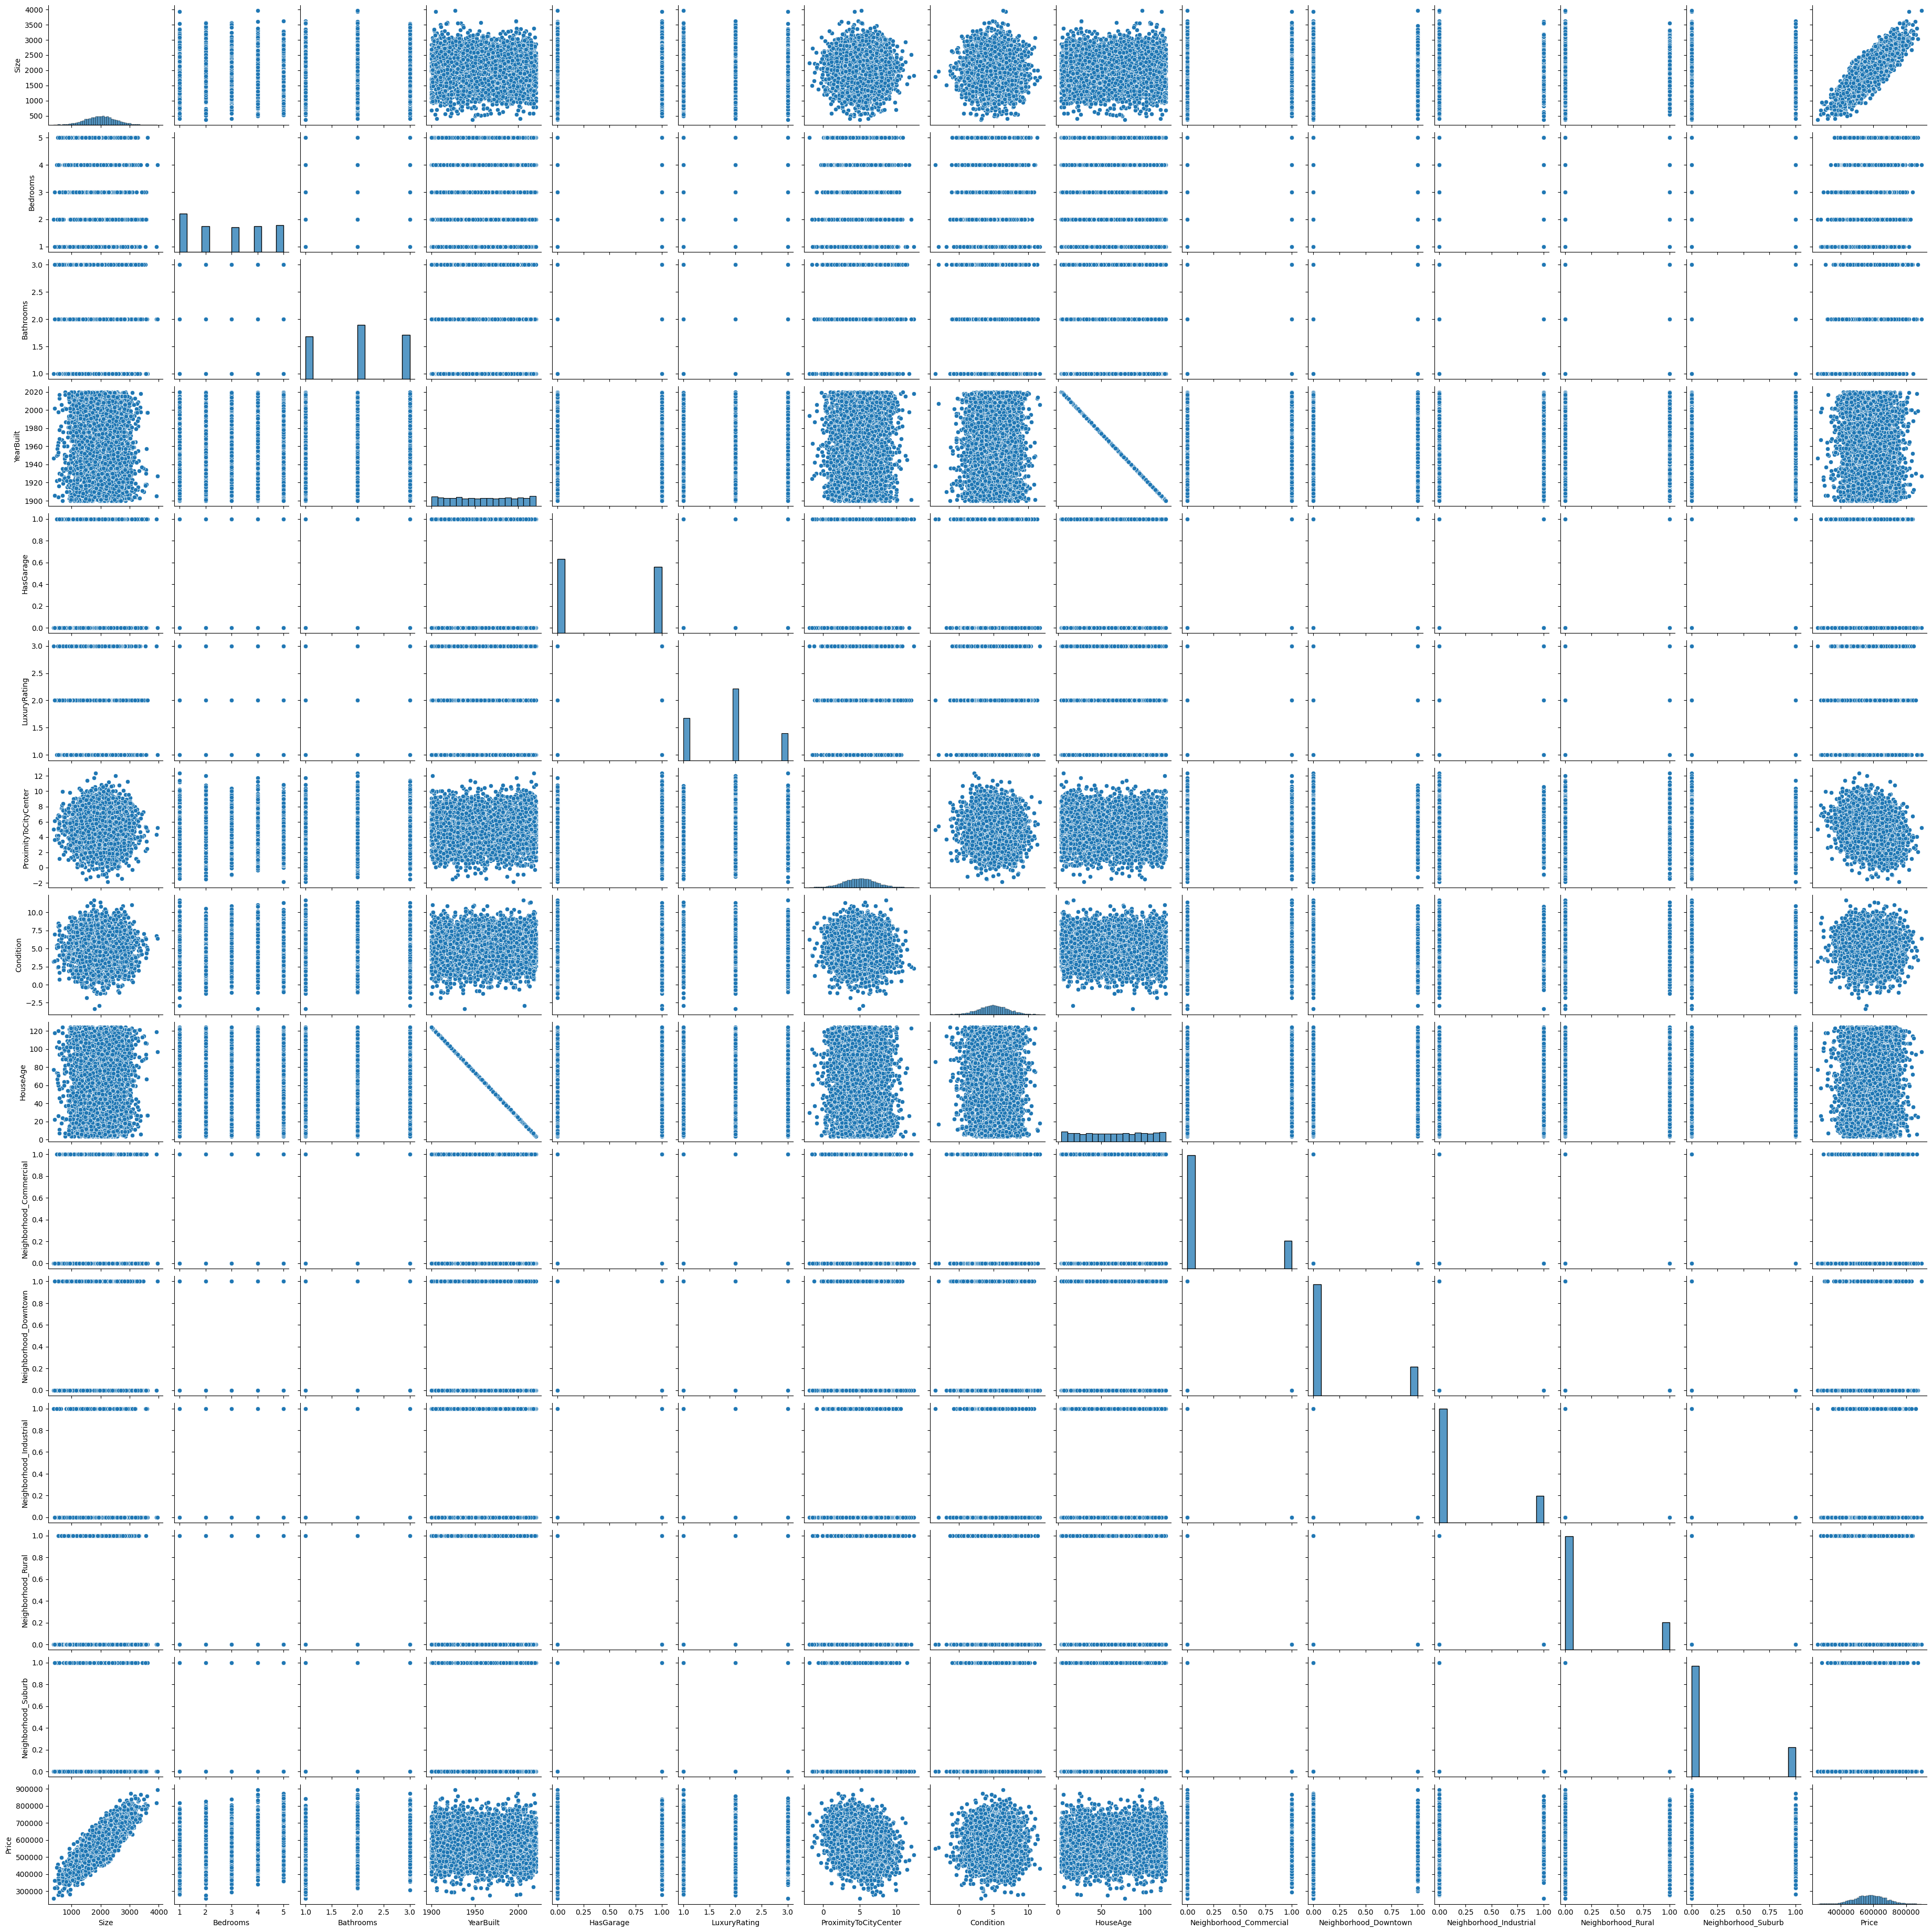

In [ ]:
sns.pairplot(data)

In [ ]:
data.drop(columns=['YearBuilt'],inplace=True)

In [ ]:
data

Size  Bedrooms  Bathrooms  HasGarage  LuxuryRating  \
0    10000.00      1.00       2.00       0.00             2   
1     1930.87      4.00       3.00       0.00             2   
2     2323.84      5.00       1.00       0.00             2   
3     2761.51      4.00       2.00       1.00             1   
4     1882.92      3.00       2.00       0.00             2   
...       ...       ...        ...        ...           ...   
4995  1975.52      2.00       2.00       0.00             2   
4996  2355.71      4.00       2.00       0.00             1   
4997  3556.46      2.00       1.00       0.00             1   
4998  2404.02      2.00       1.00       1.00             1   
4999  1575.97      1.00       1.00       0.00             1   

      ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
0                     30.00       5.49        51                        1   
1                      1.80       7.00        96                        0   
2                      7.57       3.09        15                        1   
3                      2.76       5.36        62                        0   
4                      5.54       3.72        23                        0   
...                     ...        ...       ...                      ...   
4995                   4.50       4.56        76                        0   
4996                   3.16       4.54        88                        1   
4997                   5.28       6.34        94                        0   
4998                   6.53       6.88        94                        0   
4999                   4.72       4.82        66                        0   

      Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                         0                        0                   0   
1                         0                        1                   0   
2                         0                        0                   0   
3                         0                        1                   0   
4                         0                        0                   0   
...                     ...                      ...                 ...   
4995                      0                        1                   0   
4996                      0                        0                   0   
4997                      0                        1                   0   
4998                      0                        0                   0   
4999                      1                        0                   0   

      Neighborhood_Suburb      Price  
0                       0 1488980.07  
1                       0  638342.80  
2                       0  585864.15  
3                       0  714818.82  
4                       1  563705.77  
...                   ...        ...  
4995                    0  557243.49  
4996                    0  689191.72  
4997                    0  760530.27  
4998                    1  575174.84  
4999                    0  431929.06  

[5000 rows x 14 columns]

<Axes: >

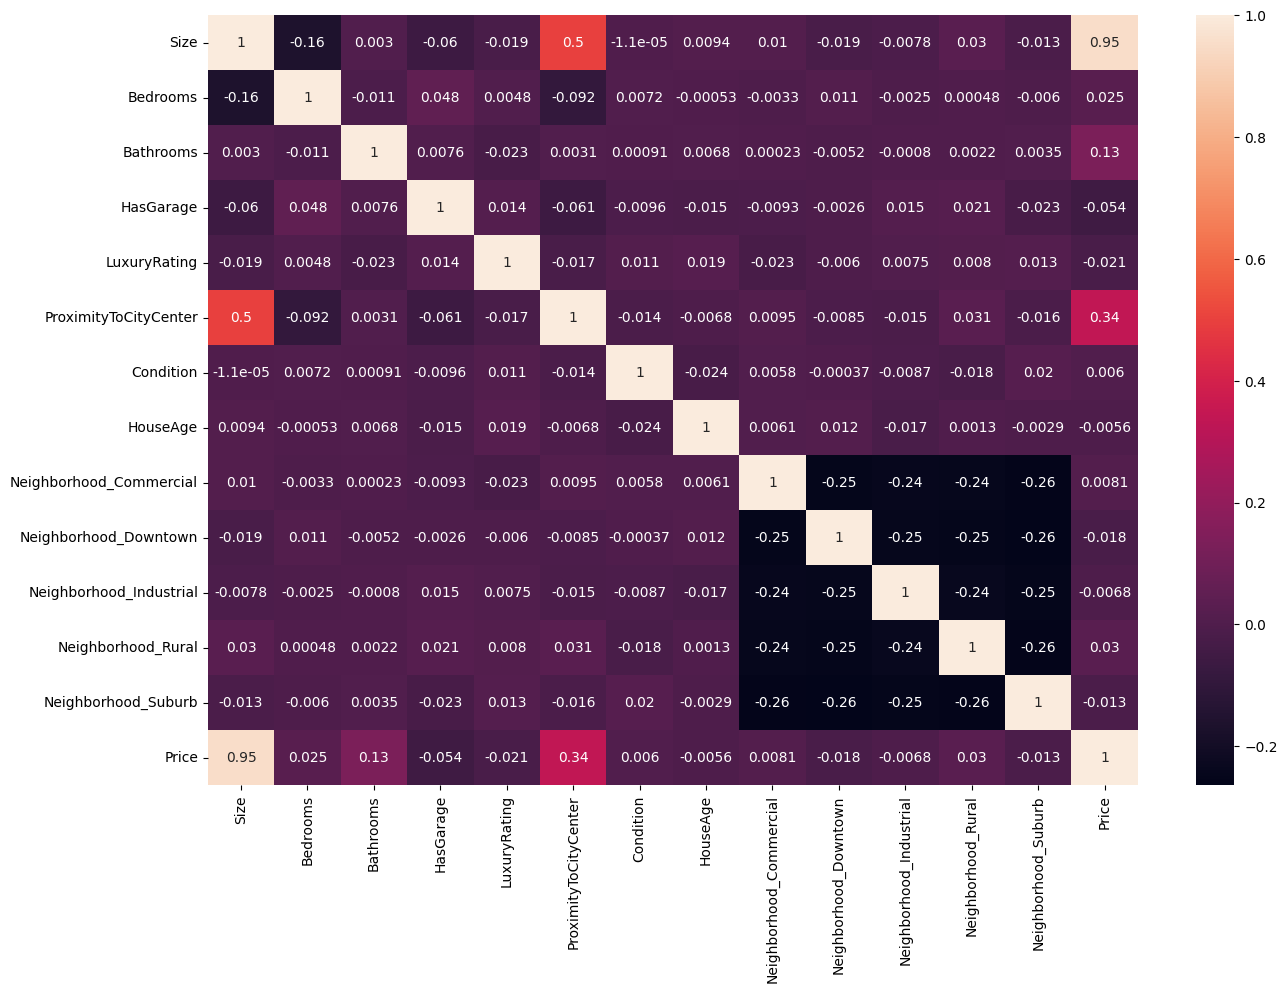

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
scaling = StandardScaler()

In [ ]:
X=data.drop(columns='Price')

In [ ]:
X.head()

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0 10000.00       NaN        NaN   Commercial       1973        NaN   
1  1930.87      4.00       3.00   Industrial       1928       0.00   
2  2323.84      5.00       1.00   Commercial       2009       0.00   
3  2761.51      4.00       2.00   Industrial       1962       1.00   
4  1882.92      3.00       2.00       Suburb       2001       0.00   

  LuxuryRating  ProximityToCityCenter  Condition  
0       Medium                  30.00       5.49  
1       Medium                   1.80       7.00  
2       Medium                   7.57       3.09  
3          Low                   2.76       5.36  
4       Medium                   5.54       3.72

In [ ]:
X.dtypes

Size                     float64
Bedrooms                 float64
Bathrooms                float64
Neighborhood              object
YearBuilt                  int64
HasGarage                float64
LuxuryRating              object
ProximityToCityCenter    float64
Condition                float64
dtype: object

In [ ]:
X.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'HasGarage', 'LuxuryRating', 'ProximityToCityCenter', 'Condition'],
      dtype='object')

In [ ]:
scaled_features = X.columns

In [ ]:
scaled_features

Index(['Size', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'HasGarage', 'LuxuryRating', 'ProximityToCityCenter', 'Condition'],
      dtype='object')

In [ ]:
data.head()

Size  Bedrooms  Bathrooms  HasGarage  LuxuryRating  \
0 10000.00      1.00       2.00       0.00             2   
1  1930.87      4.00       3.00       0.00             2   
2  2323.84      5.00       1.00       0.00             2   
3  2761.51      4.00       2.00       1.00             1   
4  1882.92      3.00       2.00       0.00             2   

   ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
0                  30.00       5.49        51                        1   
1                   1.80       7.00        96                        0   
2                   7.57       3.09        15                        1   
3                   2.76       5.36        62                        0   
4                   5.54       3.72        23                        0   

   Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
0                      0                        0                   0   
1                      0                        1                   0   
2                      0                        0                   0   
3                      0                        1                   0   
4                      0                        0                   0   

   Neighborhood_Suburb      Price  
0                    0 1488980.07  
1                    0  638342.80  
2                    0  585864.15  
3                    0  714818.82  
4                    1  563705.77

In [ ]:
scaling.fit_transform(data[scaled_features])

KeyError: "['Neighborhood', 'YearBuilt'] not in index"

In [ ]:
data[scaled_features]=scaling.fit_transform(data[scaled_features])

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_26819/3859180968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaled_features]=scaling.fit_transform(data[scaled_features])


In [ ]:
data.head()

Size  Bedrooms  Bathrooms  HasGarage  LuxuryRating  \
1 -0.146883  0.788244   1.262609  -0.945174      0.155760   
2  0.641648  1.466333  -1.288117  -0.945174      0.155760   
3  1.519860  0.788244  -0.012754   1.058006     -1.289736   
4 -0.243087  0.110155  -0.012754  -0.945174      0.155760   
5 -0.243070  1.466333  -0.012754   1.058006     -1.289736   

   ProximityToCityCenter  Condition  HouseAge  Neighborhood_Commercial  \
1              -1.597815   1.000275  0.899421                -0.493934   
2               1.284910  -0.972731 -1.390382                 2.024563   
3              -1.118715   0.169226 -0.061731                -0.493934   
4               0.267904  -0.654488 -1.164229                -0.493934   
5              -0.331363  -0.790949 -0.655383                -0.493934   

   Neighborhood_Downtown  Neighborhood_Industrial  Neighborhood_Rural  \
1              -0.511455                 2.064742           -0.491695   
2              -0.511455                -0.484322           -0.491695   
3              -0.511455                 2.064742           -0.491695   
4              -0.511455                -0.484322           -0.491695   
5              -0.511455                -0.484322            2.033782   

   Neighborhood_Suburb          Price  
1            -0.518433  638342.797067  
2            -0.518433  585864.151414  
3            -0.518433  714818.822600  
4             1.928890  563705.765490  
5            -0.518433  623286.052338

In [ ]:
data.dtypes

Size                       float64
Bedrooms                   float64
Bathrooms                  float64
HasGarage                  float64
LuxuryRating               float64
ProximityToCityCenter      float64
Condition                  float64
HouseAge                   float64
Neighborhood_Commercial    float64
Neighborhood_Downtown      float64
Neighborhood_Industrial    float64
Neighborhood_Rural         float64
Neighborhood_Suburb        float64
Price                      float64
dtype: object

<Axes: >

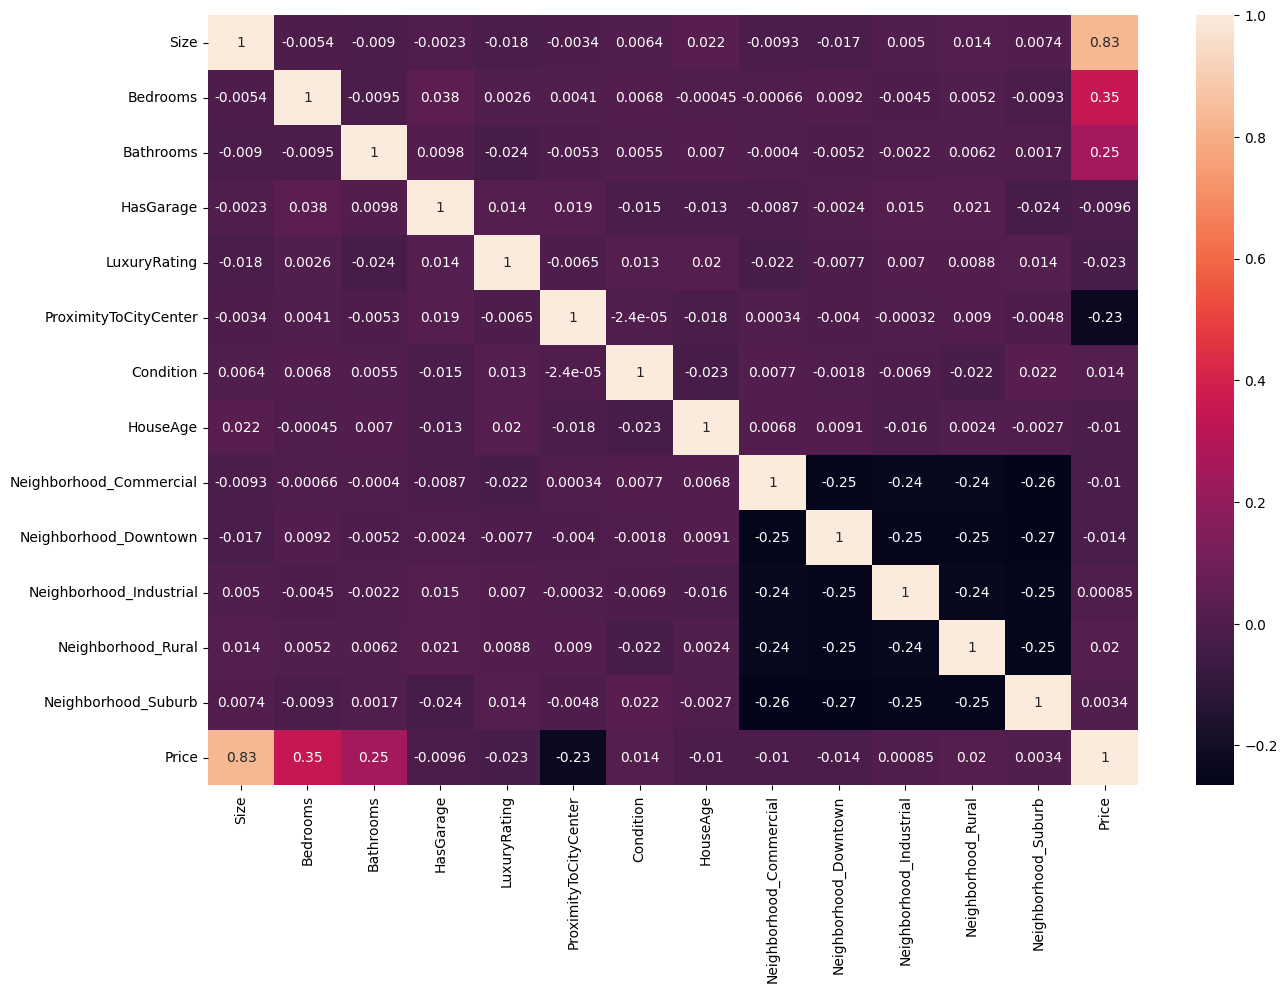

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
X = data.drop(columns = 'Price')
y = data['Price']

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.3,random_state=99)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(train_X,train_Y)

LinearRegression()

In [ ]:
model.coef_

array([ 7.46792965e+04,  3.19611593e+04,  2.32187378e+04, -2.10843622e+03,
       -2.81335906e+02, -2.02683119e+04,  5.33208785e+02, -3.33028029e+03,
        4.22573470e+17,  4.31453512e+17,  4.17506204e+17,  4.21405570e+17,
        4.34862897e+17])

In [ ]:
model.intercept_

np.float64(581357.4600790081)

<Axes: >

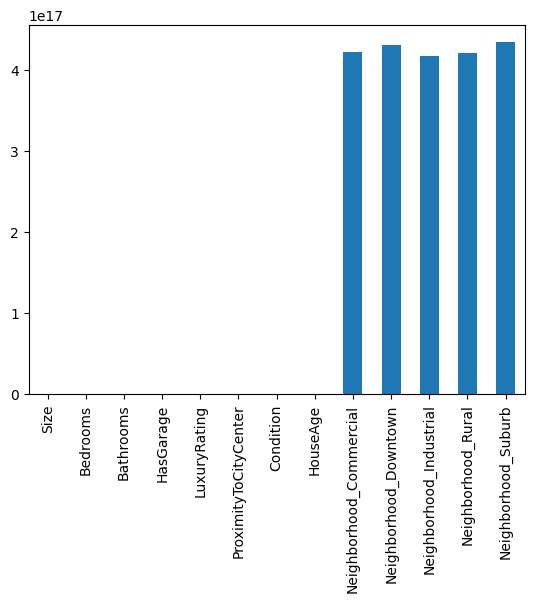

In [ ]:
pd.Series(model.coef_,index=X.columns).plot(kind='bar')

In [ ]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [ ]:
train_res=eval(train_Y,train_pred,'Train Dataset')
print('==============================')
test_res=eval(test_Y,test_pred,'Test Dataset')

Train Dataset :  MSE
566924427.403729
Train Dataset :  MAPE
0.03316415560541806
Train Dataset :  RMSE
23810.174871338702
Train Dataset :  R2_Score
0.9291998864728481
<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'float'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'float'>
<class 'float'>
Test Dataset :  MSE
544550351.2024165
Test Dataset :  MAPE
0.03188621387851774
Test Dataset :  RMSE
23335.602653508147
Test Dataset :  R2_Score
0.9351281715914468
<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'float'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'float'>
<class 'float'>


In [ ]:
def eval (actual,pred,source):
    print(source,': ',"MSE")
    print(mean_squared_error(actual,pred))
    MSE=mean_squared_error(actual,pred)
    print(source,': ',"MAPE")
    print(mean_absolute_percentage_error(actual,pred))
    MAPE=mean_absolute_percentage_error(actual,pred)
    print(source,': ',"RMSE")
    print(np.sqrt(mean_squared_error(actual,pred)))
    RMSE=np.sqrt(mean_squared_error(actual,pred))
    print(source,': ',"R2_Score")
    print(r2_score(actual,pred))
    R2_Score=r2_score(actual,pred)
    print(type(MSE),type(RMSE),type(MAPE),type(R2_Score))
    print(type(MSE),type(RMSE),type(MAPE),type(R2_Score))
    MSE= float(MSE)
    print(type(MSE))
    return(float(MSE),float(RMSE),float(MAPE),R2_Score)

    
    


In [ ]:
print(train_res)
print(type(train_res))
print(type( ))
print(list(train_res))
print(type(list(train_res)))

(566924427.403729, 23810.174871338702, 0.03316415560541806, 0.9291998864728481)
<class 'tuple'>
<class 'tuple'>
[566924427.403729, 23810.174871338702, 0.03316415560541806, 0.9291998864728481]
<class 'list'>


In [ ]:
test_res
print(type(test_res))
print(list(test_res))
print(type(list(test_res)))

<class 'tuple'>
[544550351.2024165, 23335.602653508147, 0.03188621387851774, 0.9351281715914468]
<class 'list'>


In [ ]:
res=list(train_res)+list(test_res)

In [ ]:
res

[[566924427.403729,
  23810.174871338702,
  0.03316415560541806,
  0.9291998864728481],
 [544550351.2024165,
  23335.602653508147,
  0.03188621387851774,
  0.9351281715914468]]

In [ ]:
res=[list(train_res)]+[list(test_res)]

In [ ]:
res

[[566924427.403729,
  23810.174871338702,
  0.03316415560541806,
  0.9291998864728481],
 [544550351.2024165,
  23335.602653508147,
  0.03188621387851774,
  0.9351281715914468]]

In [ ]:
res=[list(train_res),list(test_res)]

In [ ]:
res

[[566924427.403729,
  23810.174871338702,
  0.03316415560541806,
  0.9291998864728481],
 [544550351.2024165,
  23335.602653508147,
  0.03188621387851774,
  0.9351281715914468]]

In [ ]:
pd.DataFrame(res,columns=['MSE','RMSE','MAPE','R2_Score'],index=['Train','Test'])

MSE     RMSE  MAPE  R2_Score
Train 566924427.40 23810.17  0.03      0.93
Test  544550351.20 23335.60  0.03      0.94

In [ ]:
X.shape

(5000, 9)

In [ ]:
X.head()

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0 10000.00       NaN        NaN   Commercial       1973        NaN   
1  1930.87      4.00       3.00   Industrial       1928       0.00   
2  2323.84      5.00       1.00   Commercial       2009       0.00   
3  2761.51      4.00       2.00   Industrial       1962       1.00   
4  1882.92      3.00       2.00       Suburb       2001       0.00   

  LuxuryRating  ProximityToCityCenter  Condition  
0       Medium                  30.00       5.49  
1       Medium                   1.80       7.00  
2       Medium                   7.57       3.09  
3          Low                   2.76       5.36  
4       Medium                   5.54       3.72

Feature Selection

In [ ]:
select_k_best = SelectKBest(f_regression,k=5)

In [ ]:
X.head()

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0 10000.00       NaN        NaN   Commercial       1973        NaN   
1  1930.87      4.00       3.00   Industrial       1928       0.00   
2  2323.84      5.00       1.00   Commercial       2009       0.00   
3  2761.51      4.00       2.00   Industrial       1962       1.00   
4  1882.92      3.00       2.00       Suburb       2001       0.00   

  LuxuryRating  ProximityToCityCenter  Condition  
0       Medium                  30.00       5.49  
1       Medium                   1.80       7.00  
2       Medium                   7.57       3.09  
3          Low                   2.76       5.36  
4       Medium                   5.54       3.72

In [ ]:
y.head()

Price
0 1488980.07
1  638342.80
2  585864.15
3  714818.82
4  563705.77

In [ ]:
x_select = select_k_best.fit_transform(X,y)

ValueError: could not convert string to float: 'Commercial'

In [ ]:
len(x_select)

4900

In [1]:
select_k_best.get_support()

NameError: name 'select_k_best' is not defined

In [ ]:
X.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'HasGarage', 'LuxuryRating', 'ProximityToCityCenter', 'Condition'],
      dtype='object')

In [ ]:
selected_feature_names = X.columns[select_k_best.get_support()]

NotFittedError: This SelectKBest instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [2]:
selected_feature_names

NameError: name 'selected_feature_names' is not defined

In [3]:
X1=X[selected_feature_names]

NameError: name 'X' is not defined

In [ ]:
X1

NameError: name 'X1' is not defined

In [ ]:
y=data['Price']

In [ ]:
y.head()

0   1488980.07
1    638342.80
2    585864.15
3    714818.82
4    563705.77
Name: Price, dtype: float64

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y.columns

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
y=pd.DataFrame(data['Price'])

In [ ]:
y.head()

Price
0 1488980.07
1  638342.80
2  585864.15
3  714818.82
4  563705.77

In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
selectk=SelectKBest(f_regression,k=6)

In [ ]:
x2_select = selectk.fit_transform(X1,y)

NameError: name 'X1' is not defined

In [ ]:
Selected_column=selectk.get_support()

In [ ]:
Selected_column

array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False,  True, False])

In [ ]:
X.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object')

In [ ]:
pd.DataFrame(X.columns,Selected_column,columns=['column_name','Selected_column'])

ValueError: Shape of passed values is (13, 1), indices imply (13, 2)

In [ ]:
pd.DataFrame({'column_name':X.columns,'Selected_column':Selected_column})

NameError: name 'Selected_column' is not defined

In [ ]:
X1.shape

(4900, 5)

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(X1,y,test_size=0.3,random_state=99)

In [ ]:
train_X.shape

(3430, 5)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
model.coef_

array([ 74665.78904499,  31970.4729844 ,  23290.76540198,   -559.17185798,
       -20270.73128691])

In [ ]:
float(model.intercept_)

581322.0665616941

<Axes: >

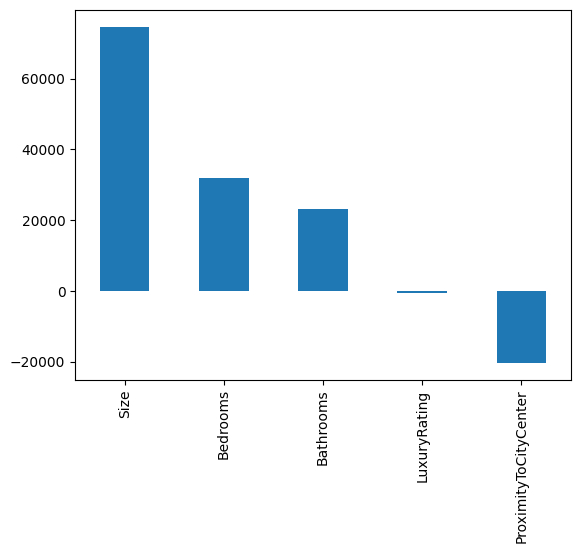

In [ ]:
pd.Series(model.coef_,index=X1.columns).plot(kind='bar')

In [ ]:
train_pred=model.predict(train_y)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
train_pred=model.predict(train_X)
test_pred=model.predict(test_X)

In [ ]:
def eval (actual,pred,source):
    print(source,': ',"MSE")
    print(mean_squared_error(actual,pred))
    MSE=mean_squared_error(actual,pred)
    print(source,': ',"MAPE")
    print(mean_absolute_percentage_error(actual,pred))
    MAPE=mean_absolute_percentage_error(actual,pred)
    print(source,': ',"RMSE")
    print(np.sqrt(mean_squared_error(actual,pred)))
    RMSE=np.sqrt(mean_squared_error(actual,pred))
    print(source,': ',"R2_Score")
    print(r2_score(actual,pred))
    R2_Score=r2_score(actual,pred)
    return(float(MSE),float(RMSE),float(MAPE),R2_Score)

    

In [ ]:
train_res=eval(train_y,train_pred,"Train Dataset")
print('======================================')
test_res=eval(test_y,test_pred,"Train Dataset")

Train Dataset :  MSE
583047027.1947489
Train Dataset :  MAPE
0.03350332729731633
Train Dataset :  RMSE
24146.36674936312
Train Dataset :  R2_Score
0.9271864225253084
Train Dataset :  MSE
549539235.926253
Train Dataset :  MAPE
0.032254477377626475
Train Dataset :  RMSE
23442.253217774374
Train Dataset :  R2_Score
0.934533849922128


In [ ]:
res=[train_res]+[test_res]
res

[(583047027.1947489,
  24146.36674936312,
  0.03350332729731633,
  0.9271864225253084),
 (549539235.926253,
  23442.253217774374,
  0.032254477377626475,
  0.934533849922128)]

In [ ]:
pd.DataFrame(res,columns=['MSE','RMSE','MAPE','R2_Score'],index=['Train','Test'])

MSE     RMSE  MAPE  R2_Score
Train 583047027.19 24146.37  0.03      0.93
Test  549539235.93 23442.25  0.03      0.93

In [ ]:
data.dtypes

Size                     float64
Bedrooms                 float64
Bathrooms                float64
Neighborhood              object
YearBuilt                  int64
HasGarage                float64
LuxuryRating              object
ProximityToCityCenter    float64
Condition                float64
Price                    float64
dtype: object

In [ ]:
data.shape

(5000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Size                   5000 non-null   float64
 1   Bedrooms               4500 non-null   float64
 2   Bathrooms              4666 non-null   float64
 3   Neighborhood           5000 non-null   object 
 4   YearBuilt              5000 non-null   int64  
 5   HasGarage              4750 non-null   float64
 6   LuxuryRating           5000 non-null   object 
 7   ProximityToCityCenter  5000 non-null   float64
 8   Condition              5000 non-null   float64
 9   Price                  5000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 390.8+ KB


In [ ]:
data.describe()

Size     Bedrooms    Bathrooms    YearBuilt    HasGarage  \
count   5000.000000  4500.000000  4666.000000  5000.000000  4750.000000   
mean    2163.987908     3.000889     2.011573  1959.813800     0.491789   
std     1223.447638     1.428911     0.809029    35.331952     0.499985   
min      379.366330     1.000000     1.000000  1900.000000     0.000000   
25%     1678.028844     2.000000     1.000000  1929.000000     0.000000   
50%     2019.060368     3.000000     2.000000  1959.500000     0.000000   
75%     2354.863069     4.000000     3.000000  1991.000000     1.000000   
max    10000.000000     5.000000     3.000000  2020.000000     1.000000   

       ProximityToCityCenter    Condition         Price  
count            5000.000000  5000.000000  5.000000e+03  
mean                5.249621     5.019177  6.032616e+05  
std                 3.185696     1.981795  1.761719e+05  
min                -1.883158    -3.372295  2.570866e+05  
25%                 3.599235     3.670990  5.227377e+05  
50%                 5.023551     5.021152  5.843121e+05  
75%                 6.371980     6.368168  6.482723e+05  
max                30.000000    11.690949  1.837662e+06

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isna().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
Neighborhood               0
YearBuilt                  0
HasGarage                250
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

<Axes: >

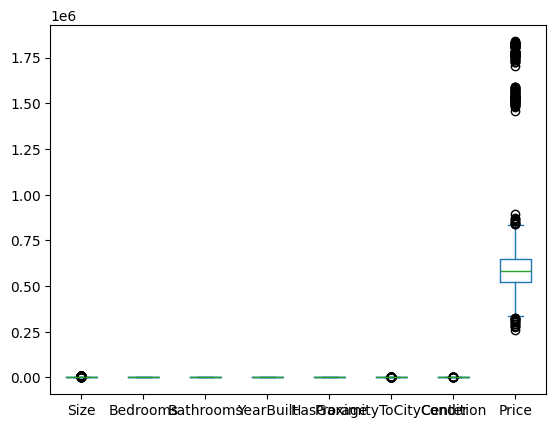

In [ ]:
data.plot(kind='box')

<Axes: >

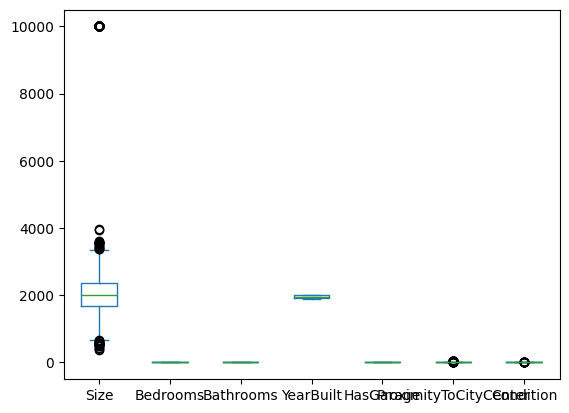

In [ ]:
data.drop(columns='Price').plot(kind='box')

<Axes: >

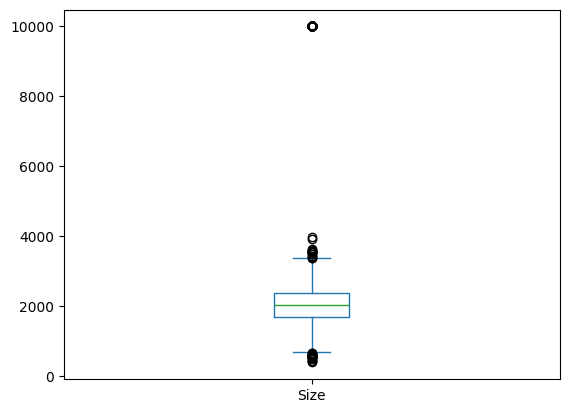

In [ ]:
data['Size'].plot(kind='box')

In [ ]:
data.head()

Size  Bedrooms  Bathrooms Neighborhood  YearBuilt  HasGarage  \
0  10000.000000       NaN        NaN   Commercial       1973        NaN   
1   1930.867849       4.0        3.0   Industrial       1928        0.0   
2   2323.844269       5.0        1.0   Commercial       2009        0.0   
3   2761.514928       4.0        2.0   Industrial       1962        1.0   
4   1882.923313       3.0        2.0       Suburb       2001        0.0   

  LuxuryRating  ProximityToCityCenter  Condition         Price  
0       Medium              30.000000   5.488515  1.488980e+06  
1       Medium               1.802602   7.003753  6.383428e+05  
2       Medium               7.573310   3.090808  5.858642e+05  
3          Low               2.761676   5.355583  7.148188e+05  
4       Medium               5.537443   3.721960  5.637058e+05

Size
Bedrooms
Bathrooms
Neighborhood


TypeError: no numeric data to plot

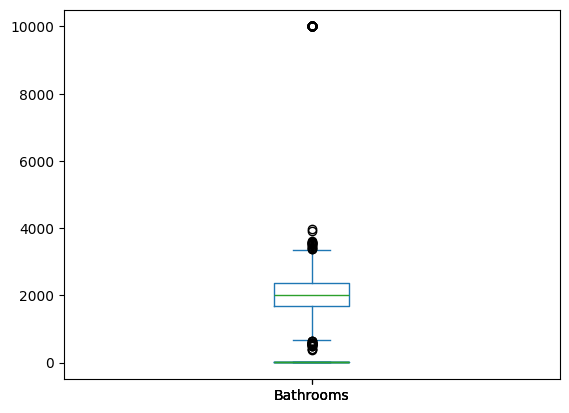

In [ ]:
for col in data.columns:
    print(col)
    data[col].dropna().plot(kind='box')


Size
Bedrooms
Bathrooms
Neighborhood


ValueError: could not convert string to float: 'Commercial'

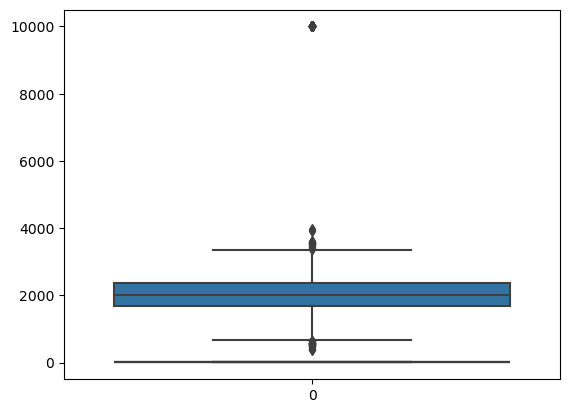

In [ ]:
for col in data.columns:
    print(col)
    sns.boxplot(data[col])

In [ ]:
num_col = data.select_dtypes(exclude='object').dropna()

In [ ]:
sns.boxplot(num_col['Size'])

KeyError: 0

<Axes: >

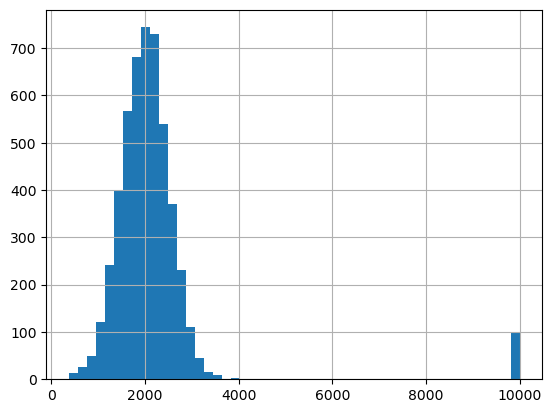

In [ ]:
data['Size'].hist(bins=50)

<Axes: >

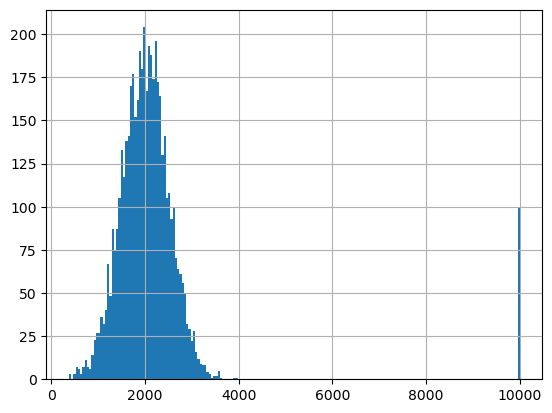

In [ ]:
data['Size'].hist(bins=200)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

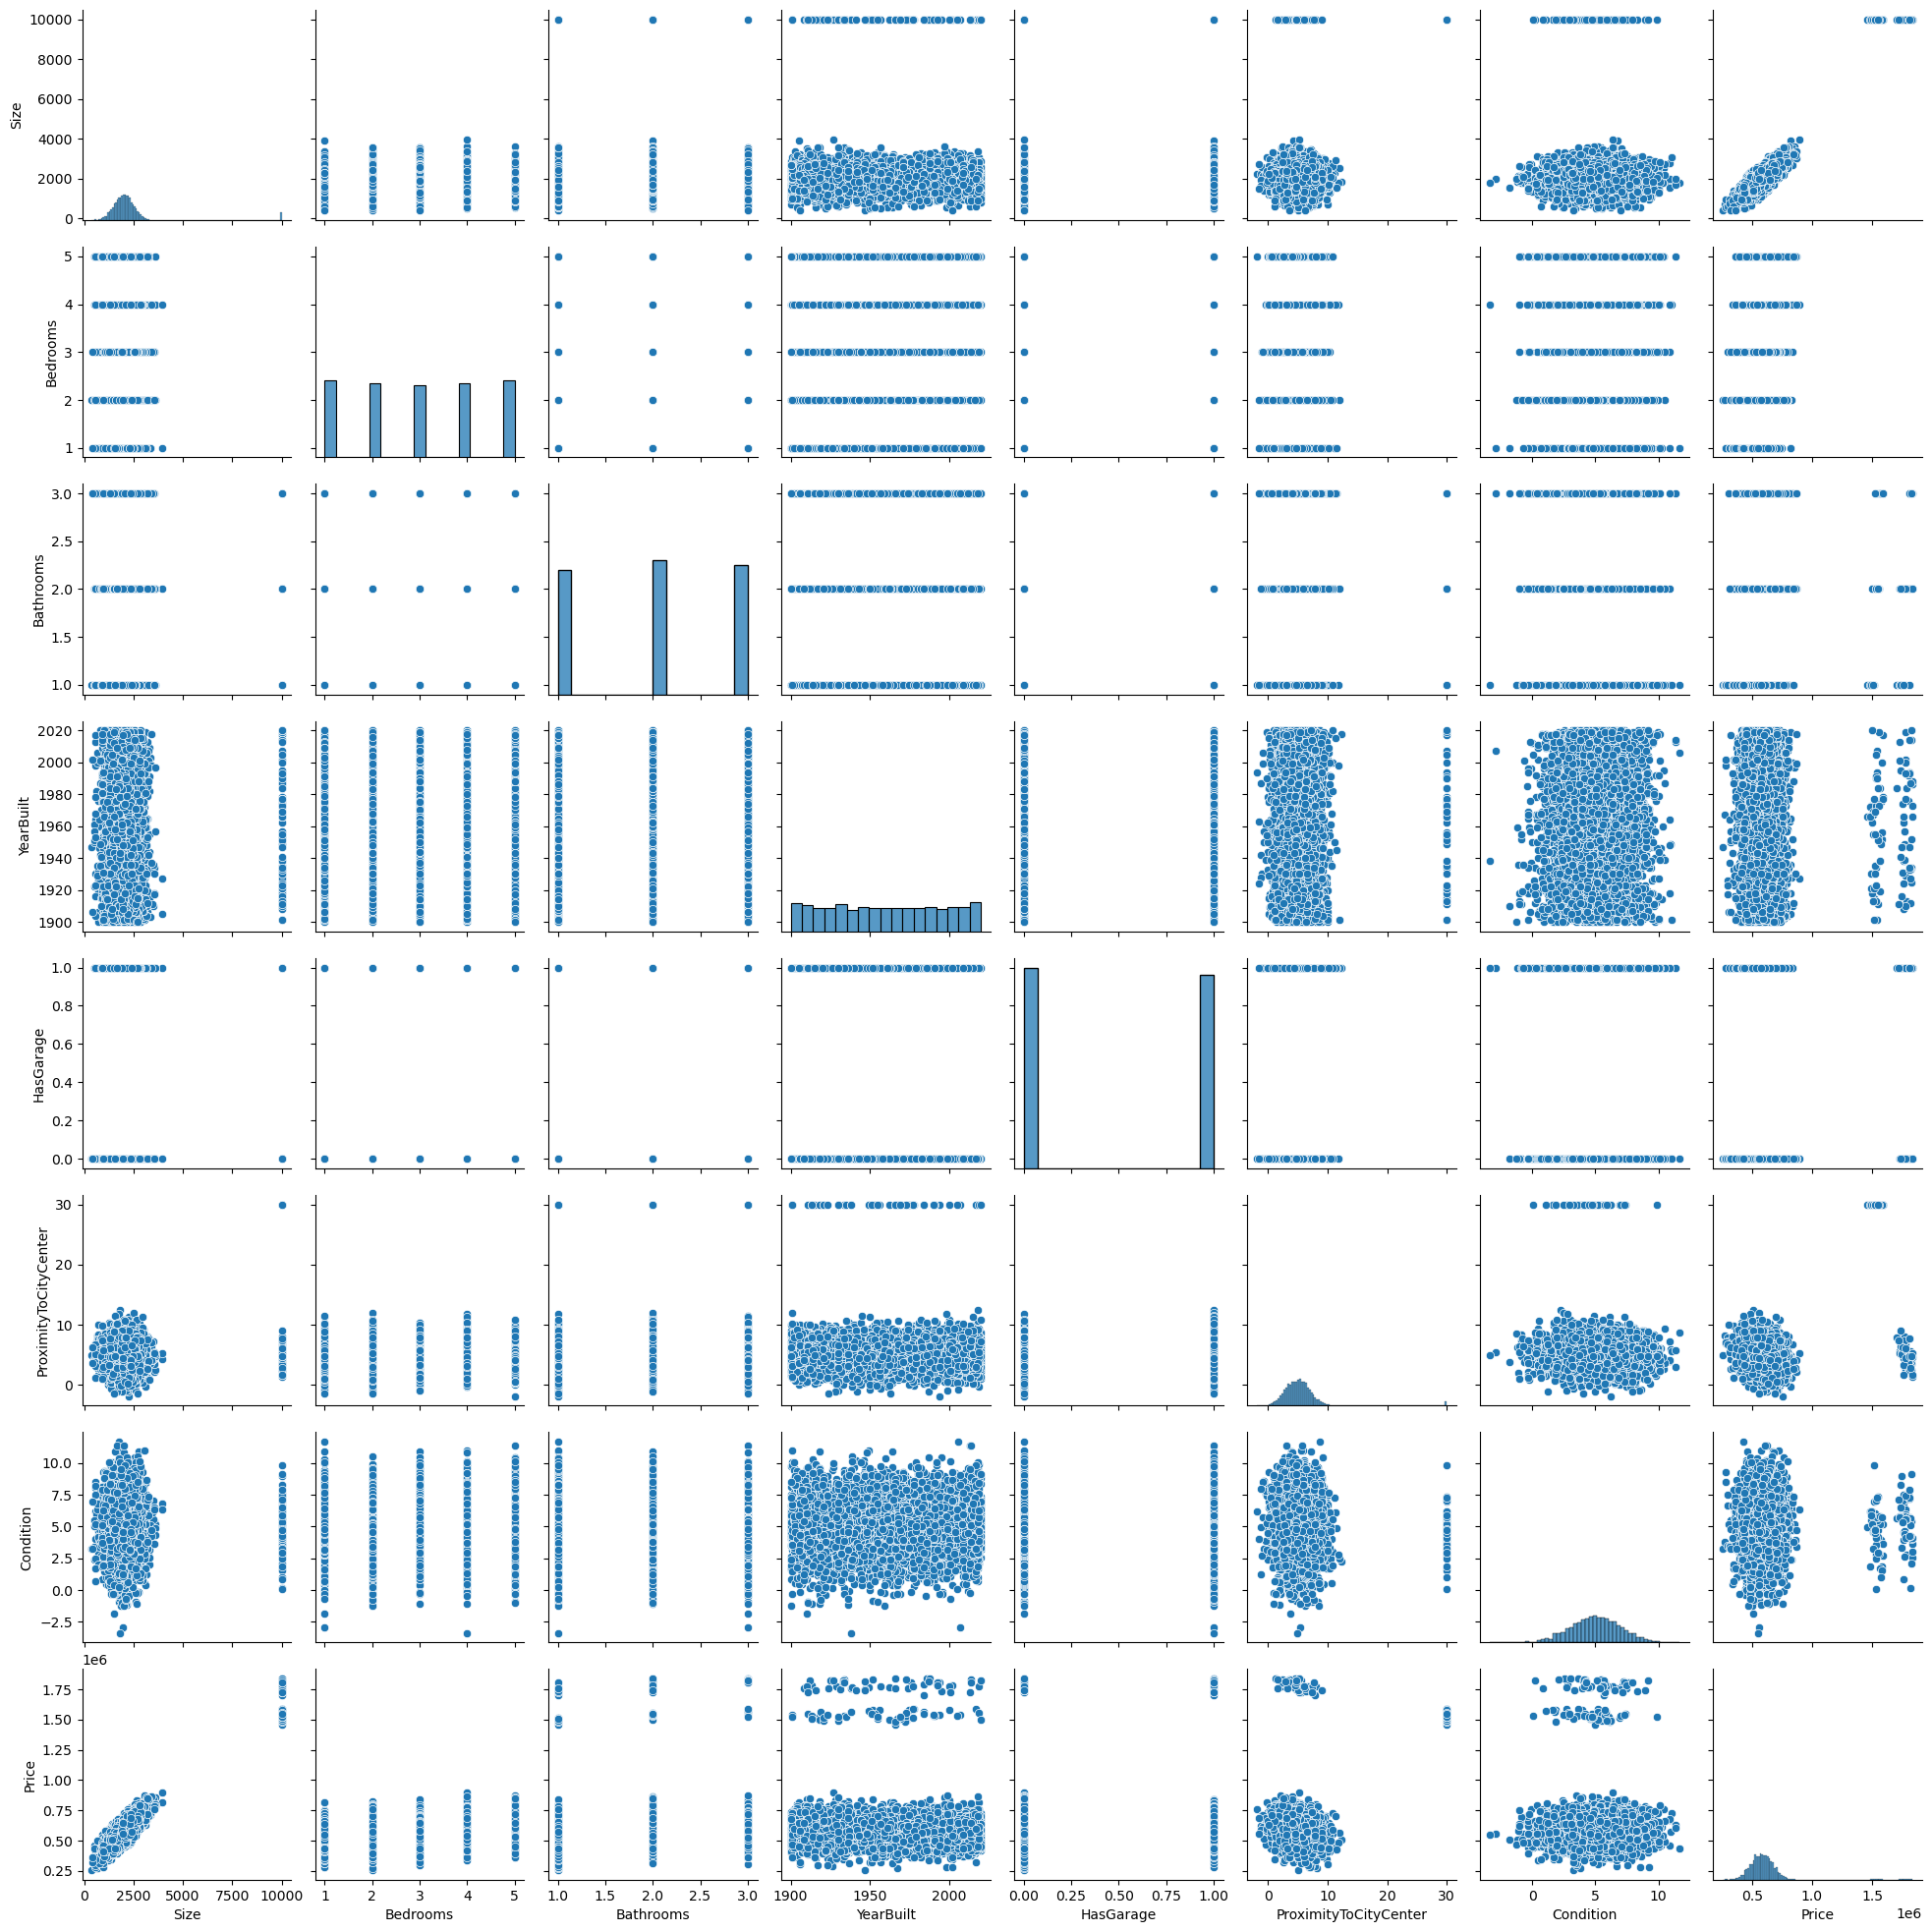

In [ ]:
sns.pairplot(data)

In [ ]:
data.describe()

Size     Bedrooms    Bathrooms    YearBuilt    HasGarage  \
count   5000.000000  4500.000000  4666.000000  5000.000000  4750.000000   
mean    2163.987908     3.000889     2.011573  1959.813800     0.491789   
std     1223.447638     1.428911     0.809029    35.331952     0.499985   
min      379.366330     1.000000     1.000000  1900.000000     0.000000   
25%     1678.028844     2.000000     1.000000  1929.000000     0.000000   
50%     2019.060368     3.000000     2.000000  1959.500000     0.000000   
75%     2354.863069     4.000000     3.000000  1991.000000     1.000000   
max    10000.000000     5.000000     3.000000  2020.000000     1.000000   

       ProximityToCityCenter    Condition         Price  
count            5000.000000  5000.000000  5.000000e+03  
mean                5.249621     5.019177  6.032616e+05  
std                 3.185696     1.981795  1.761719e+05  
min                -1.883158    -3.372295  2.570866e+05  
25%                 3.599235     3.670990  5.227377e+05  
50%                 5.023551     5.021152  5.843121e+05  
75%                 6.371980     6.368168  6.482723e+05  
max                30.000000    11.690949  1.837662e+06

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Size                   5000 non-null   float64
 1   Bedrooms               4500 non-null   float64
 2   Bathrooms              4666 non-null   float64
 3   Neighborhood           5000 non-null   object 
 4   YearBuilt              5000 non-null   int64  
 5   HasGarage              4750 non-null   float64
 6   LuxuryRating           5000 non-null   object 
 7   ProximityToCityCenter  5000 non-null   float64
 8   Condition              5000 non-null   float64
 9   Price                  5000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 390.8+ KB


In [ ]:
data1=data.select_dtypes(exclude='object')

In [ ]:
data1

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
0     10000.000000       NaN        NaN       1973        NaN   
1      1930.867849       4.0        3.0       1928        0.0   
2      2323.844269       5.0        1.0       2009        0.0   
3      2761.514928       4.0        2.0       1962        1.0   
4      1882.923313       3.0        2.0       2001        0.0   
...            ...       ...        ...        ...        ...   
4995   1975.517485       2.0        NaN       1948        0.0   
4996   2355.705290       4.0        2.0       1936        0.0   
4997   3556.455101       2.0        1.0       1930        0.0   
4998   2404.018095       2.0        1.0       1930        1.0   
4999   1575.967201       1.0        1.0       1958        0.0   

      ProximityToCityCenter  Condition         Price  
0                 30.000000   5.488515  1.488980e+06  
1                  1.802602   7.003753  6.383428e+05  
2                  7.573310   3.090808  5.858642e+05  
3                  2.761676   5.355583  7.148188e+05  
4                  5.537443   3.721960  5.637058e+05  
...                     ...        ...           ...  
4995               4.502521   4.562272  5.572435e+05  
4996               3.156012   4.543997  6.891917e+05  
4997               5.276355   6.338340  7.605303e+05  
4998               6.526272   6.879909  5.751748e+05  
4999               4.717330   4.821827  4.319291e+05  

[5000 rows x 8 columns]

In [ ]:
data1.corr()

Size  Bedrooms  Bathrooms  YearBuilt  HasGarage  \
Size                   1.000000 -0.002868   0.004128  -0.009397  -0.000767   
Bedrooms              -0.002868  1.000000  -0.007199   0.003371  -0.009011   
Bathrooms              0.004128 -0.007199   1.000000  -0.007046   0.006780   
YearBuilt             -0.009397  0.003371  -0.007046   1.000000   0.016489   
HasGarage             -0.000767 -0.009011   0.006780   0.016489   1.000000   
ProximityToCityCenter  0.498816 -0.001710   0.003935   0.006787   0.019281   
Condition             -0.000011  0.004088   0.000893   0.024348  -0.013893   
Price                  0.952369  0.392132   0.156912   0.005592  -0.005184   

                       ProximityToCityCenter  Condition     Price  
Size                                0.498816  -0.000011  0.952369  
Bedrooms                           -0.001710   0.004088  0.392132  
Bathrooms                           0.003935   0.000893  0.156912  
YearBuilt                           0.006787   0.024348  0.005592  
HasGarage                           0.019281  -0.013893 -0.005184  
ProximityToCityCenter               1.000000  -0.014041  0.338437  
Condition                          -0.014041   1.000000  0.005978  
Price                               0.338437   0.005978  1.000000

<Axes: >

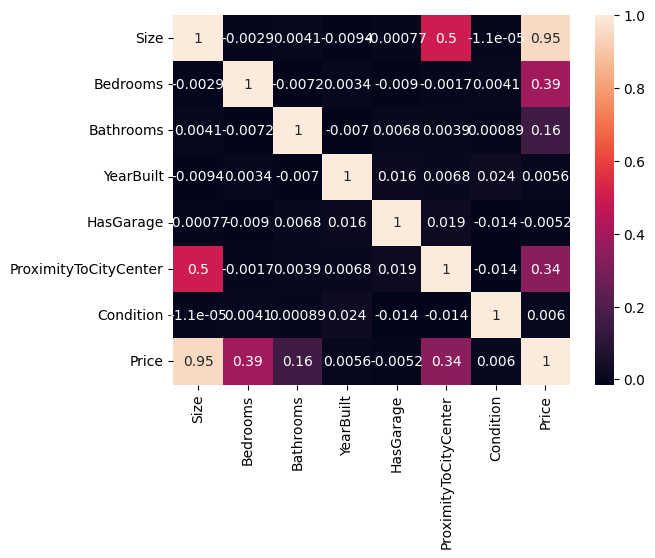

In [ ]:
sns.heatmap(data1.corr(),annot=True)

In [ ]:

plt.figure(figsize=(10, 8))  # Adjust figsize to fit your needs
sns.heatmap(data1.corr(), annot=True)
plt.show()

TypeError: 'module' object is not callable

In [ ]:
X=pd.DataFrame(np.array([1,2,3,4,5,6,15]))

In [ ]:
X

0
0   1
1   2
2   3
3   4
4   5
5   6
6  10

<Axes: >

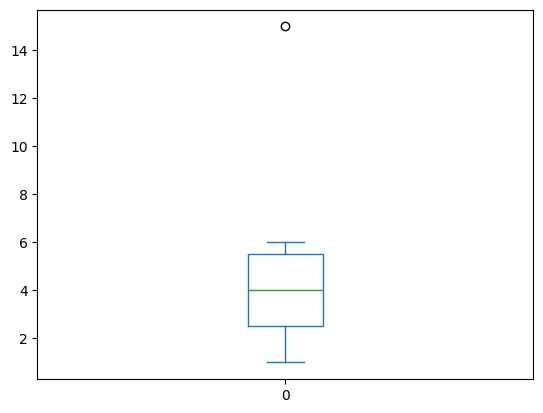

In [ ]:
X.plot(kind='box')

line
box
barh
bar
hist
area


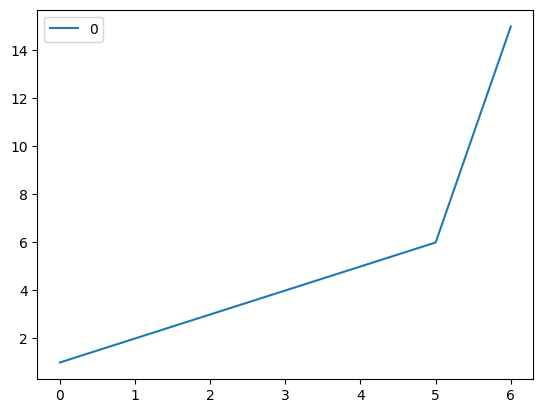

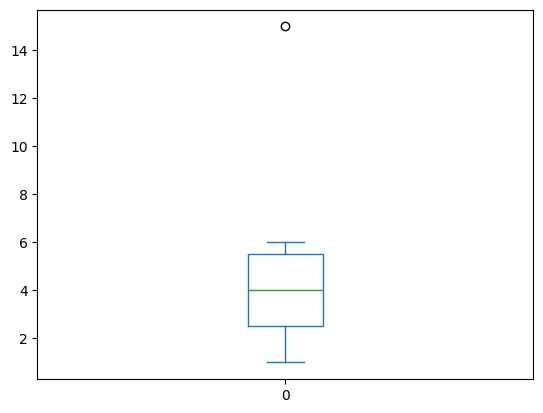

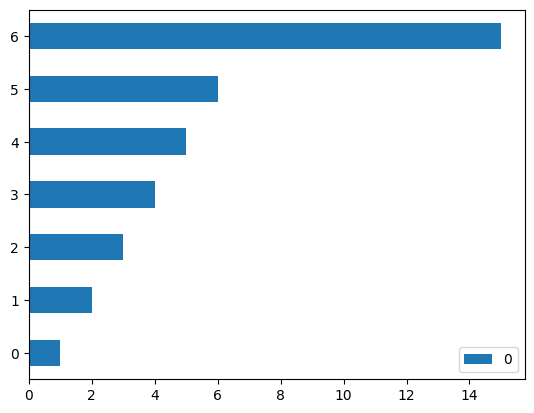

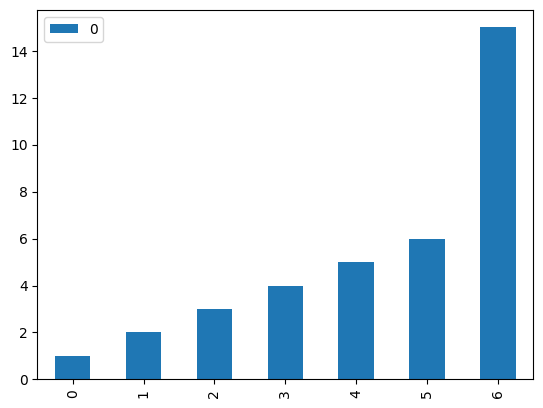

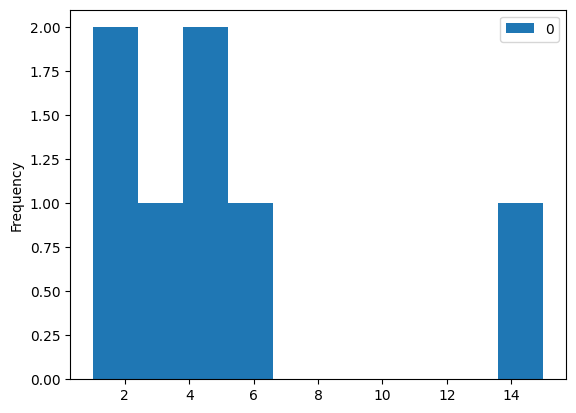

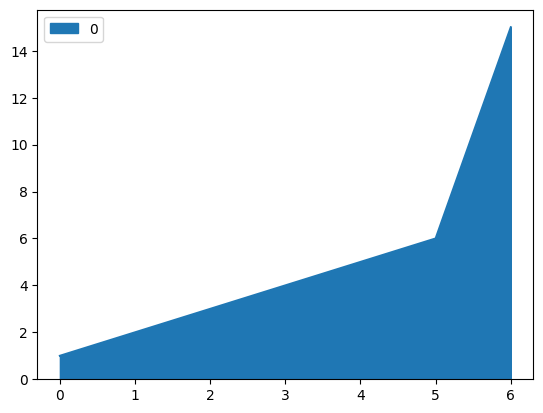

In [ ]:
for i in ['line','box','barh','bar','hist','area']:
    print(i)
    X.plot(kind=i)

<Axes: ylabel='count'>

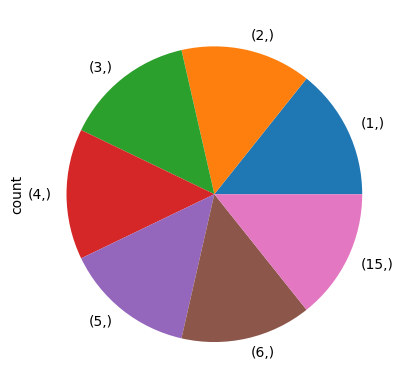

In [ ]:
X.value_counts().plot(kind='pie')

ValueError: pie requires either y column or 'subplots=True'

In [ ]:
import joblib

In [ ]:
os.getpwd()

AttributeError: module 'os' has no attribute 'getpwd'